In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

## 1. Data Loading

In [2]:
buyside_consensus_responses = pd.read_csv("buyside_consensus_responses.csv")
buyside_consensus_responses['created'] = pd.to_datetime(buyside_consensus_responses['created'],unit='s')
buyside_consensus_responses.head()

,id,action,available,created,user_id,entity,pollQuestion,answer,answeredAt,userType
0,2e8d98c8a420c8a105633664608dae51fa0e08c79db084...,created,NaN,2019-05-01 20:53:50,ed05e54715f719ac55456751c4e921541c184ab51755d9...,I-On Digital Corp.,What is your sentiment on this name?,Bullish,1556744030,buyside
1,7e971e09c1bee01d362197d686d3828b83fcdb4ec48a02...,created,NaN,2019-05-01 20:53:59,ed05e54715f719ac55456751c4e921541c184ab51755d9...,NaN,NaN,Too Negative,1556744039,buyside
2,2b33eaa2e6a92149f6d8e603f437ec560a0a278e0917e8...,created,NaN,2019-05-01 20:54:03,ed05e54715f719ac55456751c4e921541c184ab51755d9...,NaN,NaN,Very Bullish,1556744043,buyside
3,716e113a2455a6e97fe0ea7870b8af44737f2646dc28e3...,created,NaN,2019-05-01 20:54:10,ed05e54715f719ac55456751c4e921541c184ab51755d9...,NaN,NaN,Common Equity,1556744050,buyside
4,1b4879408482905993a83bdd3fa79929a6553a1a133471...,created,NaN,2019-05-01 20:54:16,ed05e54715f719ac55456751c4e921541c184ab51755d9...,NaN,NaN,Would Not Short,1556744056,buyside


In [3]:
comments = pd.read_csv("comments.csv")
comments['created'] = pd.to_datetime(comments['created'],unit='s')
comments.head()

,id,action,available,created,idea_id,user_id,anonymous,word_count,body
0,04bda1c0ed5dde0551bc023f1f5eb89003335ad5319bd6...,created,NaN,2008-02-25 20:58:24,c6d1623eb842537751177b0593c8dc5ed244fedee7c6dd...,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,False,1,test
1,fc102a3c408fd242eb55d5465b81b9043240cddb5fdd36...,created,NaN,2008-03-15 15:39:07,b10b6934253cdac1be045a592b14de69186816b2886a66...,0a6ae96890e72672ddbcfb90a85e881be64dbf3a425825...,False,22,Why is this not still overvalued at 18x 2-year...
2,2a45415dc719eec34aeb9b7e26ee08120d60f9d65ad9cf...,created,NaN,2008-03-15 15:45:28,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,0a6ae96890e72672ddbcfb90a85e881be64dbf3a425825...,False,43,What is Sallie Mae's leverage through the sr u...
3,772b07585aee4bcf3050b60ef8bcf63eee48a8306582ae...,created,NaN,2008-03-15 22:06:07,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,False,46,Since Sallie is a financial the metrics are di...
4,41013e47638d11d48de796802191f1361911f38e6cfb24...,created,NaN,2008-03-15 22:57:49,b67b52a2f9a4247fb22cfee65f2f7223ee61aacf200083...,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,False,48,"Maybe a wimpy, but better risk/reward way to p..."


In [4]:
follows = pd.read_csv("follows.csv")
follows['created'] = pd.to_datetime(follows['created'],unit='s')
follows.head()

,id,action,available,created,followed_type,followed_id,user_id,fs_perm_sec_id
0,85723ffef41bcd5daea27fa19e65e7b2b16fd25cf65c71...,follow,1480475548,2016-11-30 03:12:28,entity,MON:US,ebedaa966c9b8b8826013dd39ff0ecb6635e2f98ef7dc2...,CN7JPT-S-US
1,90c25d74547e95d5c9b2569ba72442b6bf3a50af0cd5f7...,follow,1480475549,2016-11-30 03:12:29,entity,ZINC:US,ebedaa966c9b8b8826013dd39ff0ecb6635e2f98ef7dc2...,HY2B88-S-US
2,72bd49d9d2089be3d9a38362173f19f703c958d86accd6...,follow,1480475552,2016-11-30 03:12:32,entity,MOS:US,ebedaa966c9b8b8826013dd39ff0ecb6635e2f98ef7dc2...,GW5WZK-S-US
3,e0ef9cf229851c910825ecba95daf94c0e6e98e93fc012...,follow,1480475553,2016-11-30 03:12:33,entity,POT:CN,ebedaa966c9b8b8826013dd39ff0ecb6635e2f98ef7dc2...,T3YRTC-S-CA
4,f6529dbf647b0dae5bd11f6b4486fb2329e6e5d6af0931...,follow,1480475565,2016-11-30 03:12:45,entity,BRK/A:US,ebedaa966c9b8b8826013dd39ff0ecb6635e2f98ef7dc2...,MFY3RF-S-US


In [5]:
idea_attachments = pd.read_csv("idea_attachments.csv")
idea_attachments['created'] = pd.to_datetime(idea_attachments['created'],unit='s')
idea_attachments

,id,action,available,created,attachment_type,idea_id
0,f677f977ae27277703698aa037eaa42852b200478adc15...,create,1.212125e+09,2014-04-26 07:33:34,3 Statement DCF,ecf19a5931e58563696501ea00c65655ded441f3804a50...
1,f677f977ae27277703698aa037eaa42852b200478adc15...,create,1.398498e+09,2014-04-26 07:33:34,3 Statement DCF,ecf19a5931e58563696501ea00c65655ded441f3804a50...
2,b496876e1997ca3bcf2f6a5857ea87d671a1d00e599455...,create,1.243654e+09,2014-04-26 07:40:54,Other,a0c34da6f90efa821b47bf6c42eeeb2d17b846f73c6746...
3,b496876e1997ca3bcf2f6a5857ea87d671a1d00e599455...,create,1.398498e+09,2014-04-26 07:40:54,Other,a0c34da6f90efa821b47bf6c42eeeb2d17b846f73c6746...
4,3f8c675b9ba75b7ff6a34b0ec18e2b3868d7842880cc3f...,create,1.247205e+09,2014-04-26 07:41:53,Other,423383cc5490b9545abf2ee02cc64990f741330ed66f12...
...,...,...,...,...,...,...
19281,f983e25815fd6398b332fb4a16c7b38afbb4f1318997cc...,update,NaN,2022-11-29 21:10:43,Other,998f5b6d8b1d2908f17b23ffafea46874823f13e3ab7b4...
19282,e6ab66531a2c3feac2b8c18de583044971ca67a9d6fa0d...,update,NaN,2022-11-30 01:10:40,3 Statement DCF,3fabc51993699175452cf6490c573493e8ca9c95951f90...
19283,48f7907920c46ff008a18cc6ab8eeff811f769c545e950...,create,1.669858e+09,2022-12-01 01:28:19,Formatted Thesis,b292b546a46719f3ec7a0299d49e4f76bb6f66919ed070...
19284,b27c8edcc9bc0ecd98c790f8e37c370d810181fd837662...,create,1.669866e+09,2022-12-01 03:45:34,Formatted Thesis,1528bd9db3a52d0f9d2bab2dfb37186acb68d8b69fa8f6...


In [6]:
idea_catalysts = pd.read_csv("idea_catalysts.csv")
idea_catalysts['created'] = pd.to_datetime(idea_catalysts['created'],unit='s')
idea_catalysts
# idea information

,id,idea_id,name,created,action,available
0,fe8da466380965178ba50ece344c53cd5f0ad30e064eb8...,6e258ebe585a973bf4899a84054da09a65b49259c8e680...,Dividend Distribution,2014-04-26 08:03:59,created,NaN
1,cbbc9862367e238d166240c1a189de02f83d0fc9d6e7c1...,7a2cf4338d7e50e16d99ba82e99a8e3a0edf5a1614c0e6...,M&A/Buyout Target,2014-04-26 08:17:04,created,NaN
2,44e4ada77232d3f767666d161d02acdd5190c78656d3b4...,480292e35fdfc09478dec15baca476ca6b0788f695cca4...,Litigation,2014-04-26 08:31:29,created,NaN
3,56bc0eff15fd93cc293cb4073eb0cace6b20dbc6750170...,ca13b15bfc17d8761d61076cd825a90cf4e3ef9ce472cb...,Activist Target,2014-04-26 08:38:20,created,NaN
4,d9c7fa93e64c15c6f841028d92b205687f345b6db833ad...,f2ce388aafcb4271df8908239edcacce84fbdf571f2b2f...,Litigation,2014-04-26 08:40:40,created,NaN
...,...,...,...,...,...,...
11688,b63864b2212b44a43c63279d138ecc15c6fe48e2ed1c67...,1ea96316c69d05c001ccccf5d29e900d89c13ffdfaaa1d...,Management Change,2024-04-10 20:11:41,created,NaN
11689,9b19326d41e0b7966be8eb8cdd7738d5a8d931c39da09c...,1ea96316c69d05c001ccccf5d29e900d89c13ffdfaaa1d...,Dividend Distribution,2024-04-10 20:11:41,created,NaN
11690,bcff3e8ac87d15ae3ec48b45a97b17f8932e689c469090...,1ea96316c69d05c001ccccf5d29e900d89c13ffdfaaa1d...,Activist Target,2024-04-10 20:11:41,created,NaN
11691,3d9d1d99dfd58892b66421521503a6eb1fafb7c412bfa5...,1ea96316c69d05c001ccccf5d29e900d89c13ffdfaaa1d...,Insider Buying/Selling,2024-04-10 20:11:41,created,NaN


In [7]:
idea_updates = pd.read_csv("idea_updates.csv")
idea_updates['created'] = pd.to_datetime(idea_updates['created'],unit='s')
idea_updates

,id,action,available,created,idea_id,target,timeframe,situation,word_count,body
0,e3fad2de291bd921b8041b9463f73193b149edaa928212...,create,1449948799,2015-12-12 19:33:19,acc9e6771d5900f9ea5902d47d1614adc8c01976953431...,96.0,3_months_to_6_months,contrarian,20,<div>Within 1% of my target in the expected ti...
1,907981bc277a63728df952ae84d0dacd7932dd6e74d65f...,create,1450132527,2015-12-14 22:35:27,29a848b89d9445fef948be27d8a3d40006c774d56b2475...,14.0,1_year_to_2_years,value,65,We have closed this position. Management has n...
2,a3a6508c039945ff96491d88166635117f6244e288390e...,create,1450133849,2015-12-14 22:57:29,10e015ef6d9809d4f15c9fce86448d38b823085196c678...,57.6,6_months_to_1_year,growth_at_reasonable_price,638,<p><span>This is the 3rd update to our financi...
3,398da56ea158dff285de02b7dcac209ed436ded810ef38...,create,1450144040,2015-12-15 01:47:20,ede0fee06951619c5193d53734624ae598dede7e82af67...,2.0,6_months_to_1_year,value,0,NaN
4,4fc0db307f0b92a11816526e9dccaabcb577ce2f224a54...,create,1450144084,2015-12-15 01:48:04,dec3a92f1944a9aab5fe1c6bb82870c7a972be86714606...,23.0,1_year_to_2_years,value,0,NaN
...,...,...,...,...,...,...,...,...,...,...
13111,f9b5e63038d509e547978064c4256116a101004a474055...,create,1669786688,2022-11-30 05:38:08,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,24.0,2_years_to_5_years,value,72,"<p lang=""en-GB"">Jet2 released a strong set of ..."
13112,1120fdfad1d164ce780306684614addca4813bb2accdca...,create,1669816288,2022-11-30 13:51:28,6f9bf42482aadbd3cd2dfe529a9d280ebb13daf74a1a62...,0.8,2_years_to_5_years,value,0,NaN
13113,48869f95c3d0e9a9bb83baf6dbeea8b0d2d388bcb1a2e1...,create,1669841309,2022-11-30 20:48:29,fc1fe9b91097b705382237f5a57fefa582a7311dd3d33c...,5.5,2_years_to_5_years,contrarian,0,NaN
13114,88828ad56712fc019a7aea949a047be343d1c668e8cbfc...,create,1669864464,2022-12-01 03:14:24,56896a2b1afce8bb012acc5d2f99993991fd762943b519...,42.0,6_months_to_1_year,event_/_special_situations,82,"<p>After Powell's discussion today, the Fed se..."


In [8]:
idea_views = pd.read_csv("idea_views.csv")
idea_views['created'] = pd.to_datetime(idea_views['created'],unit='s')
idea_views.head()
# Done

,id,action,created,available,idea_id
0,22cff1eb2e95f51ccb41adea7d741aacbf2ad11a074d98...,created,2014-02-03 10:16:51,NaN,5f6a2a6e13658eab54ff14222e3a7bace484a1eef33416...
1,9e6a48fcb399aa4e848eca1eba844bd9bfe22fbe4c1e68...,created,2014-02-03 10:17:00,NaN,ef26ecef31b7cc7965a5d1d8910b5f6965e36f87fadb4e...
2,13b9ba94c1e7d7f0dee23a4d04ca9f85a2879b338d702e...,created,2014-02-03 10:20:13,NaN,2f3f51c86c0c06441d38f72593da95277a1e29609821d1...
3,b6decfe421e0850b646a268d6f3f06c7abe261d5557833...,created,2014-02-03 10:36:48,NaN,d8dcf07da16e1bafcc5c28019cacf8ba1989d7a72d4228...
4,1d39cf704786d8df5dc137789c6f431bf2880bb3cf47e1...,created,2014-02-03 11:00:37,NaN,37d8cd4a060523d35b0bce7a33fead921a778bb676a92f...


In [9]:
ideas = pd.read_csv("ideas.csv")
# date convertion in the second part
ideas.head()
# Done

C:\Users\akudu\AppData\Local\Temp\ipykernel_32320\1748448385.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  ideas = pd.read_csv("ideas.csv")


,id,action,available,created,occurred,opened,non_buyside,symbol,price_target,direction,...,author_aum_range,author_title,contest_submission,position_disclaimer_fund,target_allocation,fs_perm_sec_id,position_disclaimer_individual,legacy_position_disclaimer,auto_closed,thesis
0,2b2f6f1e47dbabd8bcf14f0110896c8bd2767f7249030e...,open,1222495882,1222495882,NaN,1.222496e+09,NaN,NICK:US,10.0,NaN,...,NaN,chief_executive_officer,No,NaN,NaN,Q400NX-S-US,NaN,No,NaN,"Business Description:\nNicholas Financial, Inc..."
1,2b2f6f1e47dbabd8bcf14f0110896c8bd2767f7249030e...,redraft,1222495882,1222495882,1.222496e+09,1.222496e+09,NaN,NICK:US,10.0,NaN,...,NaN,chief_executive_officer,No,NaN,NaN,Q400NX-S-US,NaN,No,NaN,NaN
2,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,open,1205418788,1205418788,NaN,1.205419e+09,NaN,OSM:US,25.0,long,...,NaN,NaN,No,NaN,NaN,HMXWP8-S-US,NaN,No,NaN,OSM trades on the NYSE and is an equity backed...
3,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,close,1454029065,1205418788,1.454029e+09,1.205419e+09,NaN,OSM:US,25.0,long,...,NaN,NaN,No,No,NaN,HMXWP8-S-US,No,NaN,Yes,NaN
4,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,open,1205520510,1205520510,NaN,1.205521e+09,NaN,LAMR:US,75.0,long,...,NaN,vice_president,No,NaN,NaN,NL5J6M-S-US,NaN,No,NaN,LAMR is an outdoor advertising company operati...


In [10]:
likes  = pd.read_csv("likes.csv")
likes['created'] = pd.to_datetime(likes['created'],unit='s')
likes.head()
# 10710 rows, 

,id,action,available,created,liked_id,user_id
0,bc8abd08f2def1fc50377f4ffa1f960977137f852033f8...,created,NaN,2015-10-07 06:21:15,6408ec693e2e2dcd33e4f407666d205c6b952fc6649fc1...,864a7aa6dea7b451c8eff0d36756d1de86aa5eece755f9...
1,6c70cc9c19cd6c23e70575983adcaeb25cf7c83f2b66b7...,created,NaN,2015-10-07 07:18:57,9156989a221184e8930cc10a5ff9117ee7bfe9e711c26b...,39655f32c80eae01a957ba596e1ab2e9ea99d08a0c600c...
2,20b923dea776c6d9e0de3fe5984aaf563205748174b802...,created,NaN,2015-10-07 07:20:00,99b227690b59e2c98138999b2d897606933e93e84498b9...,39655f32c80eae01a957ba596e1ab2e9ea99d08a0c600c...
3,6164b94eec86b0ebdce81844947b5af5f2dc2676dc2558...,created,NaN,2015-10-07 07:20:25,628023c8909e22c9d380522e74a01f174d271f0af8a621...,39655f32c80eae01a957ba596e1ab2e9ea99d08a0c600c...
4,299a62e3a8f1146ad957417a3a0b770777754493b037cb...,created,NaN,2015-10-07 07:22:04,e510e50866eb102a4963652e3098d8c7fb35133a4b93e1...,39655f32c80eae01a957ba596e1ab2e9ea99d08a0c600c...


In [11]:
ranks = pd.read_csv("ranks.csv")
ranks['created'] = pd.to_datetime(ranks['created'],unit='s')
ranks.head()
# 32836 rows

,id,action,available,created,user_id,score,category,value,confidence
0,e68d9eaa5878281e4f74166d5dc5134877bbd9f04d35d7...,created,NaN,2016-03-05 00:37:59,a3581b9d0cd33ecc15b38d0ef948f32c5a449b71048398...,1.59271,general,22,19
1,0215063ced53895d9e34936dc02c193774c08a1106fe8f...,created,NaN,2016-03-05 00:37:59,7a171bbfc88ee315de99068440e18f7b11ad47e9a61f16...,1.66261,general,21,15
2,07d4301ad7b1b19e4340266541ff02963d491b480539df...,created,NaN,2016-03-05 00:37:59,aaf3c36beacb8b6688fddd91d4442885165cf4fcc560b6...,1.40770,general,28,9
3,adc084f336932a5ab4e168a86f80bd6badffe55891469c...,created,NaN,2016-03-05 00:37:59,f67a3f6bc3382864eb6da99108b98a62a37f16cc37abfb...,1.26858,general,35,5
4,56a218e46f566f29ed89549eff9b1c37a3f09030fadca1...,created,NaN,2016-03-05 00:37:59,5a295dfb7e09eb4d78fd7a3de6dba76aa6e4f122b390bd...,2.38444,general,7,26


### Important Notes:
### International Securities Identification Number (ISIN)/ Bloomberg Global Identifier (BBGID) /Committee on Uniform Security Identification Procedures (CUSIP)

In [12]:
symbol_mapping = pd.read_csv("symbol_mapping.csv")
symbol_mapping 

,fs_perm_sec_id,symbol_type,symbol
0,SQFNM4-S-US,ISIN,US63010N1054
1,SQFNM4-S-US,BBGID,BBG000BGPRV0
2,SQFNM4-S-US,CUSIP,63010N105
3,NMQQSH-S-US,ISIN,US69318Q1040
4,NMQQSH-S-US,BBGID,BBG00699HCV8
...,...,...,...
49445,ML4V78-S-JP,BBGID,BBG0044BVSP9
49446,ML4V78-S-JP,CUSIP,J4918G107
49447,GK6G6K-S-US,ISIN,US04546L1061
49448,GK6G6K-S-US,BBGID,BBG00F5PBW11


In [13]:
# Count how many times 'US63010N1054' appears
count = symbol_mapping[symbol_mapping ['symbol'] == 'US63010N1054'].shape[0]

# Get the corresponding 'symbol_type'
symbol_types = symbol_mapping[symbol_mapping ['symbol'] == 'US63010N1054']['symbol_type'].unique()

# Assuming you want to print the results
print(f"Count of 'US63010N1054': {count}")
print(f"Corresponding symbol_types: {symbol_types}")

Count of 'US63010N1054': 1
Corresponding symbol_types: ['ISIN']


In [14]:
user_ratings = pd.read_csv("user_ratings.csv", index_col=0)
user_ratings['created'] = pd.to_datetime(user_ratings['created'],unit='s')
user_ratings.head()
# 53033 rows

,action,available,created,user_id,idea_id,rating
id,,,,,,
dfc15fda6ddd90ef2d84d97e575cd19a47196505e9b76e9e81df7ba70547fe0f,create,NaN,2012-04-24 10:14:03,8a89b221aeff141818ff7a442f6b54bc7f907140aa713c...,3dd39ba45bb54d1a7717f6433a2a9a773bf3eac48c6098...,10
23a3d5034f68a578987e195b844a1f625204a61f03d8a042f3bbf8ac7bc7cb29,create,NaN,2012-04-24 17:21:19,24669bef2eb273abd16f7bb264927874a8dbed93d55783...,26fb69a0d94ba5f09fe17e984c85db1864028a63b5d884...,4
4423e78b0d37a8579118c767a149b1e68ee89272e09819e57a8e33feba3decb8,create,NaN,2012-04-24 17:21:39,daa5efccbfd87cd724c350a34253de5aa41ae800e9a4b6...,45c10b4466160b2334fdde2bcd225bbda6adc796d8f4a3...,4
b634a4f5dc822c21069950e0451b563ca7d63660b76b2158f2d596be1bf80302,create,NaN,2012-04-24 17:59:04,a8c174233ab3541e0d0a85f785ed61b52cb523936574a3...,5cfdb00cf1d69d7319b0907826f8f1a9102de1d4a33de7...,6
3db0dc9df031722b7f0407b6f843e05b748331bfea646360e130e6c5ef6c4820,create,NaN,2012-04-24 18:04:33,951faa05ab08b0ccd9a30776688825ecf2c2832f5b6ca7...,5280ede70c59436164522c9d1397f6757c6c08322174f4...,10


## 2. Data Cleaning

### Step One: "ideas" data cleaning (main focus)

In [15]:
ideas['available'] = pd.to_datetime(ideas['available'],unit='s')
ideas['created'] = pd.to_datetime(ideas['created'],unit='s')
ideas['occurred'] = pd.to_datetime(ideas['occurred'],unit='s')
ideas['opened'] = pd.to_datetime(ideas['opened'],unit='s')
ideas.head()

,id,action,available,created,occurred,opened,non_buyside,symbol,price_target,direction,...,author_aum_range,author_title,contest_submission,position_disclaimer_fund,target_allocation,fs_perm_sec_id,position_disclaimer_individual,legacy_position_disclaimer,auto_closed,thesis
0,2b2f6f1e47dbabd8bcf14f0110896c8bd2767f7249030e...,open,2008-09-27 06:11:22,2008-09-27 06:11:22,NaT,2008-09-27 06:11:22,NaN,NICK:US,10.0,NaN,...,NaN,chief_executive_officer,No,NaN,NaN,Q400NX-S-US,NaN,No,NaN,"Business Description:\nNicholas Financial, Inc..."
1,2b2f6f1e47dbabd8bcf14f0110896c8bd2767f7249030e...,redraft,2008-09-27 06:11:22,2008-09-27 06:11:22,2008-09-27 06:11:22,2008-09-27 06:11:22,NaN,NICK:US,10.0,NaN,...,NaN,chief_executive_officer,No,NaN,NaN,Q400NX-S-US,NaN,No,NaN,NaN
2,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,open,2008-03-13 14:33:08,2008-03-13 14:33:08,NaT,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,...,NaN,NaN,No,NaN,NaN,HMXWP8-S-US,NaN,No,NaN,OSM trades on the NYSE and is an equity backed...
3,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,close,2016-01-29 00:57:45,2008-03-13 14:33:08,2016-01-29 00:57:45,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,...,NaN,NaN,No,No,NaN,HMXWP8-S-US,No,NaN,Yes,NaN
4,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,open,2008-03-14 18:48:30,2008-03-14 18:48:30,NaT,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,...,NaN,vice_president,No,NaN,NaN,NL5J6M-S-US,NaN,No,NaN,LAMR is an outdoor advertising company operati...


In [16]:
## removing unwanted columns

ideas = ideas.drop(columns = ["available", "occurred", "opened","author_firm_type", "author_aum_range", "author_title", "contest_submission", "position_disclaimer_fund", "target_allocation", "position_disclaimer_individual", "legacy_position_disclaimer", "auto_closed"])
ideas.head()

,id,action,created,non_buyside,symbol,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis
0,2b2f6f1e47dbabd8bcf14f0110896c8bd2767f7249030e...,open,2008-09-27 06:11:22,NaN,NICK:US,10.0,NaN,1_year_to_2_years,deep_value,286,f09ec7bf440ea688fc08d20db219bc86ae525fcd7152ca...,Q400NX-S-US,"Business Description:\nNicholas Financial, Inc..."
1,2b2f6f1e47dbabd8bcf14f0110896c8bd2767f7249030e...,redraft,2008-09-27 06:11:22,NaN,NICK:US,10.0,NaN,1_year_to_2_years,deep_value,286,f09ec7bf440ea688fc08d20db219bc86ae525fcd7152ca...,Q400NX-S-US,NaN
2,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,open,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...
3,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,close,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,NaN
4,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,open,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...


In [17]:
## Dropping ideas with an idea "NaT"
ideas_with_direction = ideas.dropna(subset = ['direction'])
ideas_with_direction = ideas_with_direction.reset_index(drop = True)
ideas_with_direction.head()

,id,action,created,non_buyside,symbol,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,open,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...
1,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,close,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,NaN
2,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,open,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...
3,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,close,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,NaN
4,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,open,2008-03-15 19:18:09,NaN,PAY:US,30.0,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...


### Step Two: Merge the idea and "symbol_mapping" based on the unique fs_perm_sec_id

In [18]:
#ideas_with_direction = pd.merge(ideas_with_direction,symbol_mapping, on=['fs_perm_sec_id'], how='left')
#ideas_with_direction

Here is the case, if we only merge based on the 'fs_perm_sec_id' we wlll have 112337 rows since every 'fs_perm_sec_id' appears three times in the 'symbol_mapping' table. Therefore, we have to choose the specific criteria. I use the ISIN since it's more popular.

In [19]:
ISIN = symbol_mapping.copy()
ISIN = ISIN.drop(ISIN[ISIN.symbol_type != 'ISIN'].index)
ISIN = ISIN.drop(columns = ['symbol_type'])
ISIN = ISIN.reset_index(drop = True)
ISIN

,fs_perm_sec_id,symbol
0,SQFNM4-S-US,US63010N1054
1,NMQQSH-S-US,US69318Q1040
2,R96B55-S-US,CA9039141093
3,JS1RJ8-S-AU,AU000000GEM7
4,S39RTQ-S-US,US6903701018
...,...,...
16508,HCNK0Y-S-GB,GB00BF5HBF20
16509,QK2DR8-S-AU,AU0000111932
16510,P04JGF-S-US,NL0012170237
16511,ML4V78-S-JP,JP3047560002


In [20]:
ideas_new = pd.merge(ideas_with_direction, ISIN, on=['fs_perm_sec_id'], how='left')
ideas_new = ideas_new.rename(columns={'id':'idea_id'})
ideas_new.head()

,idea_id,action,created,non_buyside,symbol_x,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_y
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,open,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070
1,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,close,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,NaN,US63938C2070
2,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,open,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099
3,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,close,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,NaN,US5128161099
4,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,open,2008-03-15 19:18:09,NaN,PAY:US,30.0,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091


### Step Three: Grouping ideas and corresponding views

#### idea_views: counting the # of views 30 days after posting the idea

In [21]:
idea_views = idea_views.reset_index(drop = True)
idea_views.head()

,id,action,created,available,idea_id
0,22cff1eb2e95f51ccb41adea7d741aacbf2ad11a074d98...,created,2014-02-03 10:16:51,NaN,5f6a2a6e13658eab54ff14222e3a7bace484a1eef33416...
1,9e6a48fcb399aa4e848eca1eba844bd9bfe22fbe4c1e68...,created,2014-02-03 10:17:00,NaN,ef26ecef31b7cc7965a5d1d8910b5f6965e36f87fadb4e...
2,13b9ba94c1e7d7f0dee23a4d04ca9f85a2879b338d702e...,created,2014-02-03 10:20:13,NaN,2f3f51c86c0c06441d38f72593da95277a1e29609821d1...
3,b6decfe421e0850b646a268d6f3f06c7abe261d5557833...,created,2014-02-03 10:36:48,NaN,d8dcf07da16e1bafcc5c28019cacf8ba1989d7a72d4228...
4,1d39cf704786d8df5dc137789c6f431bf2880bb3cf47e1...,created,2014-02-03 11:00:37,NaN,37d8cd4a060523d35b0bce7a33fead921a778bb676a92f...


In [22]:
# add the creating date of the idea
ideas_with_views = pd.merge(idea_views, ideas_new[['idea_id', 'created']], on='idea_id', how='left')

# Add 30 days to the 'created_y' column
ideas_with_views['created_y_plus_30'] = ideas_with_views['created_y'] + pd.DateOffset(days=30)

# Filter rows where 'created_x' is less than or equal to 'created_y_plus_10'
filtered_ideas = ideas_with_views[ideas_with_views['created_x'] <= ideas_with_views['created_y_plus_30']]

# Group by 'idea_id' and count the appearances of each 'idea_id' within the date range
views_df = filtered_ideas.groupby('idea_id').size().reset_index(name='Views')

# Display the result
print(views_df)

                                                idea_id  Views
0     0000bdcb83f97e167ab4ebe3cf5c121ccead65bac24ecb...      6
1     0007dfb0f8185013dd00efe3fc294343386da340857c0a...    552
2     000faeef5c3d67a2b8b0eab887b684bd62bab91c4bcf16...    190
3     001259eec47784b686c492b62f7e3d837d0c93c17faede...    477
4     001523696d72af63fdd19f0a0f94a555cfcbc8513249b1...    270
...                                                 ...    ...
8870  ffef21912cec97add5840297faa5ffc22cd8cbdd7ed767...    114
8871  fff12258152d351aee08a9f8f4e23bc3223c27427da83a...    453
8872  fff4f2322be91bbb643416b16c76798d5fc74646996731...    110
8873  fff748238bb56b72af849016c5f1eefde40b31ba29ea71...    178
8874  fffafc0d8e9875500b31634a763c3ef8294c4b442f6090...     98

[8875 rows x 2 columns]


In [23]:
ideas_with_views = pd.merge(ideas_new, views_df, on=['idea_id'], how='left')
ideas_with_views = ideas_with_views.rename(columns={'symbol_y':'symbol_ISIN','symbol_x':'symbol_idea'})
ideas_with_views = ideas_with_views.drop(columns=['action'])
ideas_with_views

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN
1,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.0,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,NaN,US63938C2070,NaN
2,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099,NaN
3,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.0,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,NaN,US5128161099,NaN
4,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.0,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39078,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.0,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,NaN,NaN,20.0
39079,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.0,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,Business OverviewIDFCFB with a well-diversifie...,NaN,20.0
39080,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.0,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,Introduction\n \nProfitless tech firms are hav...,US7055731035,12.0
39081,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.0,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,Summary\nJet2 is a UK package holiday business...,GB00B1722W11,37.0


In [24]:
ideas_with_views = ideas_with_views.drop_duplicates(subset=['idea_id', 'created'])
ideas_with_views

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN
2,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099,NaN
4,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091,NaN
6,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,MVC is a publicly-traded private equity firm w...,US5538291023,NaN
8,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,"Visteon Corp., at $3.50 per share, is trading ...",US92839U1079,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39077,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,Oatly (OTLY) is the 24th addition to our Zombi...,US67421J1088,16.0
39078,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,NaN,NaN,20.0
39080,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,Introduction\n \nProfitless tech firms are hav...,US7055731035,12.0
39081,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,Summary\nJet2 is a UK package holiday business...,GB00B1722W11,37.0


## Step Four: Grouping Comments and updates

### 4(1). Comments

### merge the comments until 30 days after the creation of the Idea

In [25]:
comments = comments.reset_index(drop = True)
comments.head()

,id,action,available,created,idea_id,user_id,anonymous,word_count,body
0,04bda1c0ed5dde0551bc023f1f5eb89003335ad5319bd6...,created,NaN,2008-02-25 20:58:24,c6d1623eb842537751177b0593c8dc5ed244fedee7c6dd...,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,False,1,test
1,fc102a3c408fd242eb55d5465b81b9043240cddb5fdd36...,created,NaN,2008-03-15 15:39:07,b10b6934253cdac1be045a592b14de69186816b2886a66...,0a6ae96890e72672ddbcfb90a85e881be64dbf3a425825...,False,22,Why is this not still overvalued at 18x 2-year...
2,2a45415dc719eec34aeb9b7e26ee08120d60f9d65ad9cf...,created,NaN,2008-03-15 15:45:28,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,0a6ae96890e72672ddbcfb90a85e881be64dbf3a425825...,False,43,What is Sallie Mae's leverage through the sr u...
3,772b07585aee4bcf3050b60ef8bcf63eee48a8306582ae...,created,NaN,2008-03-15 22:06:07,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,False,46,Since Sallie is a financial the metrics are di...
4,41013e47638d11d48de796802191f1361911f38e6cfb24...,created,NaN,2008-03-15 22:57:49,b67b52a2f9a4247fb22cfee65f2f7223ee61aacf200083...,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,False,48,"Maybe a wimpy, but better risk/reward way to p..."


In [26]:
# add the creating date of the idea
comments = pd.merge(comments, ideas_new[['idea_id', 'created']], on='idea_id', how='left')

# Add 30 days to the 'created_y' column
comments['created_y_plus_30'] = comments['created_y'] + pd.DateOffset(days=30)

# Filter rows where 'created_x' is less than or equal to 'created_y_plus_30'
filtered_comments = comments[comments['created_x'] <= comments['created_y_plus_30']]

# Group by 'idea_id' and perform necessary aggregations
aggregated_comments = filtered_comments.groupby('idea_id').agg({
    'idea_id': 'size',  # Counts the number of comments per idea_id
    'body': ' '.join,  # Concatenates all comment bodies
    'word_count': 'sum'  # Sums all word counts
}).rename(columns={'idea_id': 'number_comments', 'body': 'body_all_comments', 'word_count': 'word_count_all_comments'})

# Display the result
aggregated_comments

,number_comments,body_all_comments,word_count_all_comments
idea_id,,,
000faeef5c3d67a2b8b0eab887b684bd62bab91c4bcf168f6a2f0495678b7d13,4,What are the current trading prices of the var...,430
001259eec47784b686c492b62f7e3d837d0c93c17faedefe205c0714c8c4c6ba,9,Love this company long term but personally wou...,876
001bab4a75b27a0ee87fda518bde8c5a6cba68736ef6ba45f3843873875d2610,4,Evan - I think you need to subtract out everyt...,1328
001f70511929b08758691abc054ef074cf67c625f62418f3c743a4f56e104aa6,2,Not that familiar with the Canadian market - d...,40
00220aa5a66beec4d77a3bf70e78096d70b081f4a420b222a831ed93fce4b2d7,28,Thanks for writeup. Well-reasoned...like hones...,3732
...,...,...,...
ffef21912cec97add5840297faa5ffc22cd8cbdd7ed767650cd4c8357b1e6bea,18,Milton - thanks for all the information in the...,5109
fff12258152d351aee08a9f8f4e23bc3223c27427da83a2eb3ba68519ef0de77,6,Jennie - guess it only took two days to get th...,87
fff4f2322be91bbb643416b16c76798d5fc74646996731d0e33ba9d7569f56d5,6,Baidu does look interesting. A couple of comm...,712


In [27]:
ideas_with_views_comments = pd.merge(ideas_with_views, aggregated_comments, on=['idea_id'], how='left')
ideas_with_views_comments

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN,4.0,What is Sallie Mae's leverage through the sr u...,178.0
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091,NaN,2.0,Looks like the situation was worse than expect...,98.0
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,MVC is a publicly-traded private equity firm w...,US5538291023,NaN,NaN,NaN,NaN
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,"Visteon Corp., at $3.50 per share, is trading ...",US92839U1079,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,Oatly (OTLY) is the 24th addition to our Zombi...,US67421J1088,16.0,3.0,strong writeup. the fundamentals are a mess. a...,121.0
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,NaN,NaN,20.0,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,Introduction\n \nProfitless tech firms are hav...,US7055731035,12.0,3.0,thanks for the writeup - interesting idea and ...,272.0
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,Summary\nJet2 is a UK package holiday business...,GB00B1722W11,37.0,2.0,Any thoughts on Meeson's succession? Heapy has...,109.0


### merge the updates until 30 days after the creation of the Idea

In [28]:
# Merge to add the creating date of the idea
idea_updates = pd.merge(idea_updates, ideas_new[['idea_id', 'created']], on='idea_id', how='left')

# Add 30 days to the 'created' column from ideas_new
idea_updates['created_y_plus_30'] = idea_updates['created_y'] + pd.DateOffset(days=30)

# Filter rows where 'created_x' is less than or equal to 'created_y_plus_30'
filtered_idea_updates = idea_updates[idea_updates['created_x'] <= idea_updates['created_y_plus_30']]

# Before grouping, ensure all elements in 'body' are strings and fill NaNs with a placeholder
filtered_idea_updates['body'] = filtered_idea_updates['body'].fillna('No comment').astype(str)

# Group by 'idea_id' and perform necessary aggregations
aggregated_idea_updates = filtered_idea_updates.groupby('idea_id').agg({
    'idea_id': 'size',  # Counts the number of updates per idea_id
    'body': ' '.join,  # Concatenates all updates bodies
    'word_count': 'sum',  # Sums all word counts (ignores NaNs by default)
    'situation': lambda x: ' '.join(x.dropna())  # Concatenates all non-null situations
}).rename(columns={
    'idea_id': 'number_updates',
    'body': 'body_all_updates',
    'word_count': 'word_count_all_updates',
    'situation': 'situation_updates'
})

# Display the result
aggregated_idea_updates

C:\Users\akudu\AppData\Local\Temp\ipykernel_32320\1150249195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_idea_updates['body'] = filtered_idea_updates['body'].fillna('No comment').astype(str)


,number_updates,body_all_updates,word_count_all_updates,situation_updates
idea_id,,,,
0007dfb0f8185013dd00efe3fc294343386da340857c0ac8535c8641694257eb,18,"<p>Over the weekend, Barron&rsquo;s wrote a <a...",2250,growth_at_reasonable_price growth_at_reasonabl...
0052d803543b1b571a3422835209e3f248b3a5e458f1b47fc500bacc4cd759a7,2,No comment No comment,0,value value
005c001e7ff827f3802668277f36b806c19e7595dfab4ebdfa60cb3ebea923d1,5,<p>Ferreycorp posted Q4 growth for sales of +8...,690,deep_value deep_value deep_value deep_value de...
007771e2c7d7cd0e42618e46f2ee6197b68fa33c5c787df544cc2a9a707679f6,2,<p>Please review the attached and formatted PD...,40,event_/_special_situations event_/_special_sit...
0085f276a2a6d6c036fe68380e1d7f8ed0c42d8486b726b72289539da8458061,2,<p>Links to some of the sources/ additional in...,110,event_/_special_situations event_/_special_sit...
...,...,...,...,...
fe977bf3aa7a84b14a80c3ba8e8662cf8c5eb6ba0b1484bd2d828b60c8ebda45,11,<p>ALKS announced 4 key updates this morning. ...,3553,growth growth growth growth growth growth grow...
ff383aeffdd0952ccae2f5adf21574c2275d3994f2725a0d202ad9db88d6288a,32,<p>Updated model.&nbsp; Added DCF.<br /><br />...,8064,value value value value value value value valu...
ff66576e441c0fadc0d4f00215d14789703a61f40541c64c1eec2e6124756a61,12,<p>I believe the market is implying a low esti...,1944,value value value value value value value valu...


In [29]:
ideas_with_views_comments_updates = pd.merge(ideas_with_views_comments, aggregated_idea_updates, on=['idea_id'], how='left')
ideas_with_views_comments_updates

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,...,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,...,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN,4.0,What is Sallie Mae's leverage through the sr u...,178.0,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,...,LAMR is an outdoor advertising company operati...,US5128161099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,...,This stock has been unfairly punished by the m...,US92342Y1091,NaN,2.0,Looks like the situation was worse than expect...,98.0,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,...,MVC is a publicly-traded private equity firm w...,US5538291023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,...,"Visteon Corp., at $3.50 per share, is trading ...",US92839U1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,...,Oatly (OTLY) is the 24th addition to our Zombi...,US67421J1088,16.0,3.0,strong writeup. the fundamentals are a mess. a...,121.0,NaN,NaN,NaN,NaN
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,...,NaN,NaN,20.0,NaN,NaN,NaN,2.0,No comment No comment,0.0,growth growth
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,...,Introduction\n \nProfitless tech firms are hav...,US7055731035,12.0,3.0,thanks for the writeup - interesting idea and ...,272.0,NaN,NaN,NaN,NaN
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,...,Summary\nJet2 is a UK package holiday business...,GB00B1722W11,37.0,2.0,Any thoughts on Meeson's succession? Heapy has...,109.0,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value


## Step Five: grouping idea_attachments, idea_catalysts

### 5(1). idea_attachments

In [30]:
# Map 'attachment_type' to new binary columns
idea_attachments['Attach_Formatted_Thesis'] = (idea_attachments['attachment_type'] == 'Formatted Thesis').astype(int)
idea_attachments['Attach_3_Statement_DCF'] = (idea_attachments['attachment_type'] == '3 Statement DCF').astype(int)
idea_attachments['Attach_Company_Presentation'] = idea_attachments['attachment_type'].isin(['Company Presentation', 'Company/Investor Presentation']).astype(int)
idea_attachments['Attach_Analysis'] = idea_attachments['attachment_type'].isin(['Industry Analysis', 'Analyst Report', 'Comp Analysis', 'Supply Chain Analysis']).astype(int)
idea_attachments['No_attach'] = idea_attachments['attachment_type'].isna().astype(int)
idea_attachments['Other_attach'] = (~(idea_attachments['attachment_type'].isin(['Formatted Thesis', '3 Statement DCF', 'Company Presentation', 'Company/Investor Presentation', 'Industry Analysis', 'Analyst Report', 'Comp Analysis', 'Supply Chain Analysis']) | idea_attachments['attachment_type'].isna())).astype(int)

# Group by 'idea_id' and 'created', summing the new binary columns
idea_attachments = idea_attachments.groupby(['idea_id', 'created']).agg({
    'Attach_Formatted_Thesis': 'sum',
    'Attach_3_Statement_DCF': 'sum',
    'Attach_Company_Presentation': 'sum',
    'Attach_Analysis': 'sum',
    'No_attach': 'sum',
    'Other_attach': 'sum'
}).reset_index()

idea_attachments


,idea_id,created,Attach_Formatted_Thesis,Attach_3_Statement_DCF,Attach_Company_Presentation,Attach_Analysis,No_attach,Other_attach
0,0000bdcb83f97e167ab4ebe3cf5c121ccead65bac24ecb...,2014-04-26 09:17:38,0,2,0,0,0,0
1,001259eec47784b686c492b62f7e3d837d0c93c17faede...,2020-04-23 19:39:03,1,0,0,0,0,0
2,001259eec47784b686c492b62f7e3d837d0c93c17faede...,2021-02-04 20:19:42,0,0,0,0,0,1
3,001523696d72af63fdd19f0a0f94a555cfcbc8513249b1...,2014-07-14 19:47:19,0,0,0,0,0,2
4,001523696d72af63fdd19f0a0f94a555cfcbc8513249b1...,2014-07-14 20:00:20,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12088,ffe5851e39fe84a2fa4d78b6a4ac10fd337a9c51874b8b...,2016-05-04 06:23:13,0,0,0,0,0,2
12089,ffef21912cec97add5840297faa5ffc22cd8cbdd7ed767...,2017-06-17 19:08:30,2,0,0,0,0,0
12090,fff12258152d351aee08a9f8f4e23bc3223c27427da83a...,2015-04-26 04:32:43,2,0,0,0,0,0
12091,fff4f2322be91bbb643416b16c76798d5fc74646996731...,2018-10-26 04:55:39,0,1,0,0,0,0


In [31]:
# Merge to add the creating date of the idea
idea_attachments = pd.merge(idea_attachments, ideas_new[['idea_id', 'created']], on='idea_id', how='left')

# Add 30 days to the 'created' column from ideas_new
idea_attachments['created_y_plus_30'] = idea_attachments['created_y'] + pd.DateOffset(days=30)

# Filter rows where 'created_x' is less than or equal to 'created_y_plus_10'
filtered_idea_attachments = idea_attachments [idea_attachments ['created_x'] <= idea_attachments['created_y_plus_30']]

filtered_idea_attachments = filtered_idea_attachments.groupby(['idea_id']).agg({
    'Attach_Formatted_Thesis': 'sum',
    'Attach_3_Statement_DCF': 'sum',
    'Attach_Company_Presentation': 'sum',
    'Attach_Analysis': 'sum',
    'No_attach': 'sum',
    'Other_attach': 'sum'
}).reset_index()

filtered_idea_attachments

,idea_id,Attach_Formatted_Thesis,Attach_3_Statement_DCF,Attach_Company_Presentation,Attach_Analysis,No_attach,Other_attach
0,001259eec47784b686c492b62f7e3d837d0c93c17faede...,3,0,0,0,0,0
1,001523696d72af63fdd19f0a0f94a555cfcbc8513249b1...,6,0,0,0,0,6
2,0017293ae22dde67d83662b69f5e13948a5e04750a1f23...,4,0,0,0,0,0
3,00176cb091e507f636e475bba075d077ff586501208bf7...,4,0,0,0,0,0
4,001bab4a75b27a0ee87fda518bde8c5a6cba68736ef6ba...,2,2,0,0,0,0
...,...,...,...,...,...,...,...
5987,ffe5851e39fe84a2fa4d78b6a4ac10fd337a9c51874b8b...,8,0,0,0,0,24
5988,ffef21912cec97add5840297faa5ffc22cd8cbdd7ed767...,6,0,0,0,0,0
5989,fff12258152d351aee08a9f8f4e23bc3223c27427da83a...,6,0,0,0,0,0
5990,fff4f2322be91bbb643416b16c76798d5fc74646996731...,0,2,0,0,0,0


In [32]:
ideas_with_views_comments_updates_attach = pd.merge(ideas_with_views_comments_updates, filtered_idea_attachments, on=['idea_id'], how='left')
ideas_with_views_comments_updates_attach

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,...,number_updates,body_all_updates,word_count_all_updates,situation_updates,Attach_Formatted_Thesis,Attach_3_Statement_DCF,Attach_Company_Presentation,Attach_Analysis,No_attach,Other_attach
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,...,2.0,No comment No comment,0.0,growth growth,NaN,NaN,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,...,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value,1.0,0.0,0.0,0.0,0.0,0.0


### 5(2). idea_catalysts

In [33]:
# Map 'attachment_type' to new binary columns
idea_catalysts['Catalyst_M&A/Buyout_Target'] = (idea_catalysts['name'] == 'M&A/Buyout Target').astype(int)
idea_catalysts['Catalyst_Management Change'] = (idea_catalysts['name'] == 'Management Change').astype(int)
idea_catalysts['Catalyst_Corporate Restructuring'] = (idea_catalysts['name'] == 'Corporate Restructuring').astype(int)
idea_catalysts['Catalyst_Dividend Distribution'] = (idea_catalysts['name'] == 'Dividend Distribution').astype(int)
idea_catalysts['Catalyst_Activist Target'] = (idea_catalysts['name'] == 'Activist Target').astype(int)
idea_catalysts['Catalyst_Spin Off'] = (idea_catalysts['name'] == 'Spin Off').astype(int)
idea_catalysts['No_Catalyst'] = idea_catalysts['name'].isna().astype(int)
idea_catalysts['Other_Catalyst'] = (~(idea_catalysts['name'].isin(['M&A/Buyout Target', 'Management Change', 'Corporate Restructuring', 'Dividend Distribution', 'Activist Target', 'Spin Off']) | idea_catalysts['name'].isna())).astype(int)

# Group by 'idea_id' and 'created', summing the new binary columns
idea_catalysts = idea_catalysts.groupby(['idea_id', 'created']).agg({
    'Catalyst_M&A/Buyout_Target': 'sum',
    'Catalyst_Management Change': 'sum',
    'Catalyst_Corporate Restructuring': 'sum',
    'Catalyst_Dividend Distribution': 'sum',
    'Catalyst_Activist Target': 'sum',
    'Catalyst_Spin Off': 'sum',
    'No_Catalyst': 'sum',
    'Other_Catalyst': 'sum'
    
}).reset_index()



In [34]:
# Merge to add the creating date of the idea
idea_catalysts = pd.merge(idea_catalysts, ideas_new[['idea_id', 'created']], on='idea_id', how='left')

# Add 10 days to the 'created' column from ideas_new
idea_catalysts['created_y_plus_30'] = idea_catalysts['created_y'] + pd.DateOffset(days=30)

# Filter rows where 'created_x' is less than or equal to 'created_y_plus_30'
filtered_idea_catalysts= idea_catalysts [idea_catalysts ['created_x'] <= idea_catalysts['created_y_plus_30']]

filtered_idea_catalysts = filtered_idea_catalysts.groupby(['idea_id']).agg({
    'Catalyst_M&A/Buyout_Target': 'sum',
    'Catalyst_Management Change': 'sum',
    'Catalyst_Corporate Restructuring': 'sum',
    'Catalyst_Dividend Distribution': 'sum',
    'Catalyst_Activist Target': 'sum',
    'Catalyst_Spin Off': 'sum',
    'No_Catalyst': 'sum',
    'Other_Catalyst': 'sum'
    
}).reset_index()


ideas_with_views_comments_updates_attach_catalysts = pd.merge(ideas_with_views_comments_updates_attach, filtered_idea_catalysts, on=['idea_id'], how='left')
ideas_with_views_comments_updates_attach_catalysts

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,...,No_attach,Other_attach,Catalyst_M&A/Buyout_Target,Catalyst_Management Change,Catalyst_Corporate Restructuring,Catalyst_Dividend Distribution,Catalyst_Activist Target,Catalyst_Spin Off,No_Catalyst,Other_Catalyst
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Step Six: User Profile (likes/user_ratings/follows) +buyside_consensus_responses

### 6(1). User Rating

In [35]:
# Merge to add the creating date of the idea
user_ratings = pd.merge(user_ratings, ideas_new[['idea_id', 'created']], on='idea_id', how='left')

# Add 10 days to the 'created' column from ideas_new
user_ratings['created_y_plus_30'] = user_ratings['created_y'] + pd.DateOffset(days=30)

# Filter rows where 'created_x' is less than or equal to 'created_y_plus_30'
filtered_user_ratings = user_ratings [user_ratings ['created_x'] <= user_ratings['created_y_plus_30']]

# Calculate the absolute time difference between created_x and created_y_plus_10
filtered_user_ratings['time_diff'] = (filtered_user_ratings['created_y_plus_30'] - filtered_user_ratings['created_x']).abs()

# Find the index of the row with the smallest time difference for each idea_id
idx = filtered_user_ratings.groupby('idea_id')['time_diff'].idxmin()

# Select the rows that correspond to the smallest time difference
closest_ratings = filtered_user_ratings.loc[idx, ['idea_id', 'rating']].rename(columns={'rating': 'user_rating'})

# Display the result
print(closest_ratings)

C:\Users\akudu\AppData\Local\Temp\ipykernel_32320\3204983154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_user_ratings['time_diff'] = (filtered_user_ratings['created_y_plus_30'] - filtered_user_ratings['created_x']).abs()


                                                  idea_id  user_rating
13477   0000bdcb83f97e167ab4ebe3cf5c121ccead65bac24ecb...            8
196916  0007dfb0f8185013dd00efe3fc294343386da340857c0a...            6
57148   000faeef5c3d67a2b8b0eab887b684bd62bab91c4bcf16...            8
156627  001259eec47784b686c492b62f7e3d837d0c93c17faede...            6
16786   001523696d72af63fdd19f0a0f94a555cfcbc8513249b1...            8
...                                                   ...          ...
80601   ffef21912cec97add5840297faa5ffc22cd8cbdd7ed767...           10
20629   fff12258152d351aee08a9f8f4e23bc3223c27427da83a...           10
8474    fff31dd7118e344eb975c8e28924b75d3bf05c655a65cb...            8
15327   fff748238bb56b72af849016c5f1eefde40b31ba29ea71...            8
62607   fffafc0d8e9875500b31634a763c3ef8294c4b442f6090...           10

[9666 rows x 2 columns]


In [36]:
ideas_with_views_comments_updates_attach_catalysts_rating = pd.merge(ideas_with_views_comments_updates_attach_catalysts, closest_ratings, on=['idea_id'], how='left')
ideas_with_views_comments_updates_attach_catalysts_rating

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,...,Other_attach,Catalyst_M&A/Buyout_Target,Catalyst_Management Change,Catalyst_Corporate Restructuring,Catalyst_Dividend Distribution,Catalyst_Activist Target,Catalyst_Spin Off,No_Catalyst,Other_Catalyst,user_rating
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0


## 6(2). likes

In [37]:
# add the creating date of the idea
likes = pd.merge(likes, ideas_new[['user_id', 'created']], on='user_id', how='left')

# Add 30 days to the 'created_y' column
likes['created_y_plus_30'] = likes['created_y'] + pd.DateOffset(days=30)

# Filter rows where 'created_x' is less than or equal to 'created_y_plus_30'
filtered_likes = likes[likes['created_x'] <= likes['created_y_plus_30']]

# Group by 'idea_id' and perform necessary aggregations
aggregated_likes = filtered_likes.groupby('user_id').agg({
    'user_id': 'size',  # Counts the number of comments per idea_id
}).rename(columns={'user_id': 'number_likes',})

ideas_with_views_comments_updates_attach_catalysts_rating_likes = pd.merge(ideas_with_views_comments_updates_attach_catalysts_rating, aggregated_likes, on=['user_id'], how='left')
ideas_with_views_comments_updates_attach_catalysts_rating_likes

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,...,Catalyst_M&A/Buyout_Target,Catalyst_Management Change,Catalyst_Corporate Restructuring,Catalyst_Dividend Distribution,Catalyst_Activist Target,Catalyst_Spin Off,No_Catalyst,Other_Catalyst,user_rating,number_likes
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5427.0
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,NaN
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,NaN


## 6(3). buyside_consensus_responses

In [38]:
# Merge the two DataFrames on 'user_id' to include the 'created' date from 'ideas_new' into 'buyside_consensus_responses'
buyside_consensus_responses = pd.merge(buyside_consensus_responses, ideas_new[['user_id', 'created']], on='user_id', how='left')

# Add 30 days to the 'created_y' column
buyside_consensus_responses['created_y_plus_30'] = buyside_consensus_responses['created_y'] + pd.DateOffset(days=30)

# Now perform the filtering based on 'created_x' and 'created_y_plus_30'
filtered_buyside_consensus_responses = buyside_consensus_responses[buyside_consensus_responses['created_x'] <= buyside_consensus_responses['created_y_plus_30']]

# Perform the aggregation based on 'user_id'
aggregated_buyside_consensus_responses = filtered_buyside_consensus_responses.groupby('user_id').agg({
    'user_id': 'size',  # Counts the number of responses per user_id
    'answer': lambda x: ' '.join(x.dropna().astype(str))  # Concatenates all answers, converting them to strings and dropping NA
}).rename(columns={
    'user_id': 'number_buyside_consensus_response', 
    'answer': 'buyside_consensus_response'
})

ideas_with_views_comments_updates_attach_catalysts_rating_likes_buyside = pd.merge(ideas_with_views_comments_updates_attach_catalysts_rating_likes, aggregated_buyside_consensus_responses, on=['user_id'], how='left')
ideas_with_views_comments_updates_attach_catalysts_rating_likes_buyside

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,...,Catalyst_Corporate Restructuring,Catalyst_Dividend Distribution,Catalyst_Activist Target,Catalyst_Spin Off,No_Catalyst,Other_Catalyst,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,...,0.0,0.0,0.0,0.0,0.0,1.0,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,...,0.0,0.0,0.0,0.0,0.0,1.0,8.0,NaN,1.0,Bullish


In [39]:
final_df = ideas_with_views_comments_updates_attach_catalysts_rating_likes_buyside

In [40]:
final_df

,idea_id,created,non_buyside,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,...,Catalyst_Corporate Restructuring,Catalyst_Dividend Distribution,Catalyst_Activist Target,Catalyst_Spin Off,No_Catalyst,Other_Catalyst,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,NaN,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,NaN,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,NaN,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,NaN,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,NaN,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,NaN,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,NaN,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,NaN,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,...,0.0,0.0,0.0,0.0,0.0,1.0,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,NaN,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,...,0.0,0.0,0.0,0.0,0.0,1.0,8.0,NaN,1.0,Bullish


## Step Seven: Final Dataframe Cleaning

## Drop irrelevant columns

In [41]:
columns_to_drop = [
    'Attach_Formatted_Thesis', 'Attach_3_Statement_DCF', 'Attach_Company_Presentation',
    'Attach_Analysis', 'No_attach', 'Other_attach', 
    'Catalyst_M&A/Buyout_Target', 'Catalyst_Management Change', 
    'Catalyst_Corporate Restructuring', 'Catalyst_Dividend Distribution', 
    'Catalyst_Activist Target', 'Catalyst_Spin Off', 'No_Catalyst', 'Other_Catalyst', 'non_buyside'
]

df_final = final_df.drop(columns=columns_to_drop)

df_final

,idea_id,created,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,...,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,OSM:US,25.00,long,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,...,What is Sallie Mae's leverage through the sr u...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.00,long,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,PAY:US,30.00,long,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,...,Looks like the situation was worse than expect...,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,MVC:US,20.00,long,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,VSTNQ:US,8.50,long,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,OTLY:US,0.78,short,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,...,strong writeup. the fundamentals are a mess. a...,121.0,NaN,NaN,NaN,NaN,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,IDFCFIRSTB,100.00,short,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,...,NaN,NaN,2.0,No comment No comment,0.0,growth growth,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,PEGA:US,18.00,short,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,...,thanks for the writeup - interesting idea and ...,272.0,NaN,NaN,NaN,NaN,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.00,long,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,...,Any thoughts on Meeson's succession? Heapy has...,109.0,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value,8.0,NaN,1.0,Bullish


## Replace values of direction (long: 1, short: -1)


In [42]:
replace_values = {'long': 1, 'short': -1}

df_final['direction'] = df_final['direction'].replace(replace_values)

In [43]:
df_final

,idea_id,created,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,...,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,OSM:US,25.00,1,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,...,What is Sallie Mae's leverage through the sr u...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.00,1,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,PAY:US,30.00,1,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,...,Looks like the situation was worse than expect...,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,MVC:US,20.00,1,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,VSTNQ:US,8.50,1,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,OTLY:US,0.78,-1,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,...,strong writeup. the fundamentals are a mess. a...,121.0,NaN,NaN,NaN,NaN,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,IDFCFIRSTB,100.00,-1,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,...,NaN,NaN,2.0,No comment No comment,0.0,growth growth,NaN,NaN,NaN,NaN
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,PEGA:US,18.00,-1,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,...,thanks for the writeup - interesting idea and ...,272.0,NaN,NaN,NaN,NaN,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.00,1,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,...,Any thoughts on Meeson's succession? Heapy has...,109.0,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value,8.0,NaN,1.0,Bullish


## Create dummy variables for timeframe 

In [44]:
df_final['time_less_than_3_months'] = np.where(df_final['timeframe'] == 'less_than_3_months', 1, 0)
df_final['time_3_months_to_6_months'] = np.where(df_final['timeframe'] == '3_months_to_6_months', 1, 0)
df_final['time_6_months_to_1_year'] = np.where(df_final['timeframe'] == '6_months_to_1_year', 1, 0)
df_final['time_1_year_to_2_years'] = np.where(df_final['timeframe'] == '1_year_to_2_years', 1, 0)
df_final['time_2_years_to_5_years'] = np.where(df_final['timeframe'] == '2_years_to_5_years', 1, 0)

df_final['time_more_than_5_years'] = np.where(~df_final['timeframe'].isin([
    'less_than_3_months', '3_months_to_6_months', '6_months_to_1_year',
    '1_year_to_2_years', '2_years_to_5_years'
]), 1, 0)

df_final = df_final.drop(columns='timeframe')

df_final 

,idea_id,created,symbol_idea,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,...,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,OSM:US,25.00,1,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.00,1,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,PAY:US,30.00,1,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,...,NaN,NaN,NaN,NaN,0,0,1,0,0,0
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,MVC:US,20.00,1,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,MVC is a publicly-traded private equity firm w...,...,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,VSTNQ:US,8.50,1,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,"Visteon Corp., at $3.50 per share, is trading ...",...,NaN,NaN,NaN,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,OTLY:US,0.78,-1,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,Oatly (OTLY) is the 24th addition to our Zombi...,...,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...,0,0,0,1,0,0
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,IDFCFIRSTB,100.00,-1,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,PEGA:US,18.00,-1,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,Introduction\n \nProfitless tech firms are hav...,...,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...,0,0,1,0,0,0
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.00,1,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,Summary\nJet2 is a UK package holiday business...,...,8.0,NaN,1.0,Bullish,0,0,0,0,1,0


In [45]:
# final dataframe display
pd.options.display.max_columns = None
print(df_final.head())

                                             idea_id             created  \
0  7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac... 2008-03-13 14:33:08   
1  e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770... 2008-03-14 18:48:30   
2  2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96... 2008-03-15 19:18:09   
3  f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d... 2008-03-16 03:31:15   
4  670530e208e8e71f047113d4607a177d5a5ac8d5bb627d... 2008-03-18 12:29:51   

  symbol_idea  price_target  direction                   situation  \
0      OSM:US          25.0          1                  deep_value   
1     LAMR:US          75.0          1                       value   
2      PAY:US          30.0          1  event_/_special_situations   
3      MVC:US          20.0          1                       value   
4    VSTNQ:US           8.5          1                  deep_value   

   thesis_word_count                                            user_id  \
0                145  fa329596650105d05a03567b9

## Fill the dataset

In [46]:
df_final

,idea_id,created,symbol_idea,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,OSM:US,25.00,1,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN,4.0,What is Sallie Mae's leverage through the sr u...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.00,1,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,PAY:US,30.00,1,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091,NaN,2.0,Looks like the situation was worse than expect...,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,MVC:US,20.00,1,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,MVC is a publicly-traded private equity firm w...,US5538291023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,VSTNQ:US,8.50,1,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,"Visteon Corp., at $3.50 per share, is trading ...",US92839U1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,OTLY:US,0.78,-1,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,Oatly (OTLY) is the 24th addition to our Zombi...,US67421J1088,16.0,3.0,strong writeup. the fundamentals are a mess. a...,121.0,NaN,NaN,NaN,NaN,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...,0,0,0,1,0,0
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,IDFCFIRSTB,100.00,-1,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,2.0,No comment No comment,0.0,growth growth,NaN,NaN,NaN,NaN,0,0,0,1,0,0
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,PEGA:US,18.00,-1,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,Introduction\n \nProfitless tech firms are hav...,US7055731035,12.0,3.0,thanks for the writeup - interesting idea and ...,272.0,NaN,NaN,NaN,NaN,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...,0,0,1,0,0,0
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.00,1,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,Summary\nJet2 is a UK package holiday business...,GB00B1722W11,37.0,2.0,Any thoughts on Meeson's succession? Heapy has...,109.0,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value,8.0,NaN,1.0,Bullish,0,0,0,0,1,0


In [47]:
#DO NOT RUN THIS CODE
df_final.to_excel('Final_df.xlsx', index=False)

In [48]:
#DO NOT RUN THIS CODE
df_final.to_csv('Final_df.csv', index=False)

In [49]:
import numpy as np 
import pandas as pd

df_final = pd.read_csv('Final_df.csv')
df_final

,idea_id,created,symbol_idea,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,OSM:US,25.00,1,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN,4.0,What is Sallie Mae's leverage through the sr u...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.00,1,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,PAY:US,30.00,1,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091,NaN,2.0,Looks like the situation was worse than expect...,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,MVC:US,20.00,1,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,MVC is a publicly-traded private equity firm w...,US5538291023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,VSTNQ:US,8.50,1,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,"Visteon Corp., at $3.50 per share, is trading ...",US92839U1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,OTLY:US,0.78,-1,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,Oatly (OTLY) is the 24th addition to our Zombi...,US67421J1088,16.0,3.0,strong writeup. the fundamentals are a mess. a...,121.0,NaN,NaN,NaN,NaN,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...,0,0,0,1,0,0
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,IDFCFIRSTB,100.00,-1,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,2.0,No comment No comment,0.0,growth growth,NaN,NaN,NaN,NaN,0,0,0,1,0,0
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,PEGA:US,18.00,-1,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,Introduction\n \nProfitless tech firms are hav...,US7055731035,12.0,3.0,thanks for the writeup - interesting idea and ...,272.0,NaN,NaN,NaN,NaN,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...,0,0,1,0,0,0
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.00,1,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,Summary\nJet2 is a UK package holiday business...,GB00B1722W11,37.0,2.0,Any thoughts on Meeson's succession? Heapy has...,109.0,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value,8.0,NaN,1.0,Bullish,0,0,0,0,1,0


In [50]:
# Import packages
import yfinance as yf
import pandas as pd

# Read and print the stock tickers that make up S&P500
snptickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(snptickers.head())

# Get the data for this tickers from yahoo finance
data = yf.download(snptickers.Symbol.to_list(),'2008-1-1','2024-1-1', auto_adjust=True)['Close']
print(data.head())

  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  
[*********************100%%**********************]  503 of 503 completed



4 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2008-1-1 -> 2024-1-1)')
['SOLV', 'GEV']: Exception("%ticker%: Data doesn't exist for startDate = 1199163600, endDate = 1704085200")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


                             A        AAL      AAPL  ABBV  ABNB        ABT  \
Date                                                                         
2008-01-02 00:00:00  23.336643  12.557317  5.883143   NaN   NaN  18.312292   
2008-01-03 00:00:00  23.105198  11.991671  5.885860   NaN   NaN  18.200735   
2008-01-04 00:00:00  22.353025  11.699422  5.436563   NaN   NaN  18.305727   
2008-01-07 00:00:00  22.719471  11.529724  5.363794   NaN   NaN  18.866810   
2008-01-08 00:00:00  22.687330  10.379586  5.170850   NaN   NaN  19.362272   

                         ACGL        ACN       ADBE        ADI        ADM  \
Date                                                                        
2008-01-02 00:00:00  7.608889  26.661091  41.709999  20.164036  29.990007   
2008-01-03 00:00:00  7.764444  26.202696  41.790001  19.858618  30.301426   
2008-01-04 00:00:00  7.702222  25.810831  40.360001  19.340744  30.380936   
2008-01-07 00:00:00  7.791111  25.115845  40.240002  19.095078  30.3

In [51]:
df_final[['symbol', 'symbol2']] = df_final['symbol_idea'].str.split(':', expand=True)

In [52]:
df_final.drop('symbol_idea', axis=1, inplace=True)
df_final

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,25.00,1,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN,4.0,What is Sallie Mae's leverage through the sr u...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,OSM,US
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,75.00,1,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,LAMR,US
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,30.00,1,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091,NaN,2.0,Looks like the situation was worse than expect...,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,PAY,US
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,20.00,1,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,MVC is a publicly-traded private equity firm w...,US5538291023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,MVC,US
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,8.50,1,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,"Visteon Corp., at $3.50 per share, is trading ...",US92839U1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,VSTNQ,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,0.78,-1,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,Oatly (OTLY) is the 24th addition to our Zombi...,US67421J1088,16.0,3.0,strong writeup. the fundamentals are a mess. a...,121.0,NaN,NaN,NaN,NaN,10.0,5427.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...,0,0,0,1,0,0,OTLY,US
15100,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,100.00,-1,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,2.0,No comment No comment,0.0,growth growth,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IDFCFIRSTB,None
15101,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,18.00,-1,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,Introduction\n \nProfitless tech firms are hav...,US7055731035,12.0,3.0,thanks for the writeup - interesting idea and ...,272.0,NaN,NaN,NaN,NaN,8.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...,0,0,1,0,0,0,PEGA,US
15102,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,24.00,1,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,Summary\nJet2 is a UK package holiday business...,GB00B1722W11,37.0,2.0,Any thoughts on Meeson's succession? Heapy has...,109.0,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value,8.0,NaN,1.0,Bullish,0,0,0,0,1,0,JET2,LN


In [54]:
# Get the ticker names from the 'names' DataFrame
ticker_names = df_final['symbol'].unique()

# Get the column names (ticker names) from the 'data' DataFrame
sp_tickers = data.columns

# Find the matching tickers
matching_tickers = [ticker for ticker in ticker_names if ticker in sp_tickers]

# Print the matching tickers
print("Matching tickers found:")
for ticker in matching_tickers:
    print(ticker)

Matching tickers found:
IR
KMX
CF
MET
TDG
UNP
ON
BK
BR
NRG
WTW
PG
DFS
DPZ
BSX
MGM
AXP
CMCSA
EBAY
NVDA
LYV
LULU
ORLY
MKC
ACGL
VLO
PM
TYL
EA
URI
UAL
NTAP
ETN
MO
MS
VZ
FCX
MLM
LVS
ALL
EXPE
MHK
FE
AZO
VMC
IRM
STX
DLR
RCL
NFLX
MA
AMZN
KR
AAPL
KO
UPS
MSFT
REG
PKG
VRSN
GRMN
CRL
BAC
LOW
FSLR
TRMB
OMC
STT
QCOM
PCAR
AVB
BRO
WBA
TFX
L
TMUS
ES
SPGI
SYY
PFE
DRI
ISRG
MTB
SHW
JPM
HST
RHI
CPRT
GLW
TGT
C
WFC
SYK
ECL
HRL
PSA
RSG
MCO
CPB
WY
TXT
IDXX
FDX
NSC
AWK
HSIC
FDS
DECK
ADM
TEL
EOG
FICO
CL
CVS
CVX
XOM
LMT
CAH
O
EIX
LKQ
VRSK
STZ
LEN
MOS
EQIX
MDLZ
AMAT
EXPD
WAB
WRB
AVY
BG
UNH
QRVO
T
MRO
DAL
CCI
RMD
WMB
ADP
DE
USB
EXC
ROST
FIS
AMT
ABT
ICE
CMG
DVA
GILD
KMB
SJM
CMI
SWK
GE
AMD
ALGN
V
DGX
WDC
MAS
NEE
CME
BBY
OXY
ARE
HD
APD
LYB
GPN
BDX
AON
WMT
HOLX
CTAS
GD
CLX
TECH
GM
HIG
NXPI
CB
CAT
APA
WRK
MU
NOC
FFIV
FRT
INTC
EQT
NVR
HAS
GS
HES
AOS
JNJ
CSCO
MSI
ROL
HII
AKAM
TTWO
DLTR
EMN
PODD
GOOGL
GNRC
PARA
ROP
TSLA
YUM
ULTA
HAL
MSCI
WYNN
CRM
COP
CCL
TXN
MPC
POOL
DVN
SCHW
CHRW
BEN
TAP
TSCO
XYL
ZBRA
AIG
TMO
BX
CE
IPG
PSX

In [55]:
# Filter the 'data' DataFrame to keep only the columns (tickers) that match the unique_tickers
matching_data = data[matching_tickers]

# Print the first few rows of the matching data
print(matching_data.head())

                     IR        KMX         CF        MET        TDG  \
Date                                                                  
2008-01-02 00:00:00 NaN  20.070000  15.906230  32.733929  18.501612   
2008-01-03 00:00:00 NaN  19.740000  16.658335  33.021259  18.661461   
2008-01-04 00:00:00 NaN  19.540001  15.999706  32.562630  18.673759   
2008-01-07 00:00:00 NaN  19.180000  15.789755  32.960491  18.481119   
2008-01-08 00:00:00 NaN  19.020000  15.644502  31.910610  17.472836   

                           UNP    ON         BK         BR        NRG  \
Date                                                                    
2008-01-02 00:00:00  21.978750  8.58  32.258209  15.891898  32.831673   
2008-01-03 00:00:00  21.911520  8.28  33.654503  16.170452  32.356312   
2008-01-04 00:00:00  21.235739  7.89  32.956360  16.241875  31.758253   
2008-01-07 00:00:00  21.049988  7.69  33.408104  16.299015  30.815163   
2008-01-08 00:00:00  20.390129  7.35  32.169247  16.499010  30.3

In [56]:
matching_data

,IR,KMX,CF,MET,TDG,UNP,ON,BK,BR,NRG,WTW,PG,DFS,DPZ,BSX,MGM,AXP,CMCSA,EBAY,NVDA,LYV,LULU,ORLY,MKC,ACGL,VLO,PM,TYL,EA,URI,UAL,NTAP,ETN,MO,MS,VZ,FCX,MLM,LVS,ALL,EXPE,MHK,FE,AZO,VMC,IRM,STX,DLR,RCL,NFLX,MA,AMZN,KR,AAPL,KO,UPS,MSFT,REG,PKG,VRSN,GRMN,CRL,BAC,LOW,FSLR,TRMB,OMC,STT,QCOM,PCAR,AVB,BRO,WBA,TFX,L,TMUS,ES,SPGI,SYY,PFE,DRI,ISRG,MTB,SHW,JPM,HST,RHI,CPRT,GLW,TGT,C,WFC,SYK,ECL,HRL,PSA,RSG,MCO,CPB,WY,TXT,IDXX,FDX,NSC,AWK,HSIC,FDS,DECK,ADM,TEL,EOG,FICO,CL,CVS,CVX,XOM,LMT,CAH,O,EIX,LKQ,VRSK,STZ,LEN,MOS,EQIX,MDLZ,AMAT,EXPD,WAB,WRB,AVY,BG,UNH,QRVO,T,MRO,DAL,CCI,RMD,WMB,ADP,DE,USB,EXC,ROST,FIS,AMT,ABT,ICE,CMG,DVA,GILD,KMB,SJM,CMI,SWK,GE,AMD,ALGN,V,DGX,WDC,MAS,NEE,CME,BBY,OXY,ARE,HD,APD,LYB,GPN,BDX,AON,WMT,HOLX,CTAS,GD,CLX,TECH,GM,HIG,NXPI,CB,CAT,APA,WRK,MU,NOC,FFIV,FRT,INTC,EQT,NVR,HAS,GS,HES,AOS,JNJ,CSCO,MSI,ROL,HII,AKAM,TTWO,DLTR,EMN,PODD,GOOGL,GNRC,PARA,ROP,TSLA,YUM,ULTA,HAL,MSCI,WYNN,CRM,COP,CCL,TXN,MPC,POOL,DVN,SCHW,CHRW,BEN,TAP,TSCO,XYL,ZBRA,AIG,TMO,BX,CE,IPG,PSX,MCD,DG,FTNT,HCA,SBAC,NDAQ,DIS,CHD,HUM,IFF,TSN,LUV,ACN,IBM,NWSA,NEM,REGN,FOXA,ORCL,D,UHS,LH,MNST,COO,KMI,NCLH,RL,COF,INTU,CDNS,JBL,AMGN,PTC,BA,TJX,F,ALLE,ADBE,CNC,MDT,SMCI,HSY,FMC,AME,AAL,KEYS,CZR,DHR,TRV,EPAM,CTSH,FAST,NI,ADSK,DOV,AIZ,ROK,PGR,PANW,PNR,GWW,CFG,HLT,RF,PAYC,DOW,MCK,PYPL,ZTS,JNPR,SWKS,GOOG,AXON,IVZ,NOW,CDW,SYF,EW,JKHY,CAG,HPE,MTCH,CSGP,TPR,SNA,BLDR,PH,ALB,NKE,IP,BMY,ZBH,COST,LW,LRCX,MKTX,TROW,CBOE,BWA,CHTR,DXCM,KLAC,ETSY,FANG,DHI,BIO,SBUX,PFG,KHC,BIIB,HUBB,AVGO,KIM,ENPH,BLK,IQV,K,GIS,PCG,SPG,CI,MCHP,BKNG,ILMN,FOX,MTD,TRGP,UBER,MRNA,ABBV,VICI,MPWR,IT,CTVA,LLY,LHX,MRK,COR,AMCR,PWR,EL,LDOS,ANET,BXP,CMA,CBRE,STE,NUE,META
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,20.070000,15.906230,32.733929,18.501612,21.978750,8.580000,32.258209,15.891898,32.831673,66.133598,44.703606,11.094354,10.480863,11.410000,77.072052,39.338623,6.404494,12.465116,7.570036,14.130000,22.410000,32.330002,13.318438,7.608889,37.774212,NaN,12.470000,55.586338,17.437454,29.915234,18.779043,29.682629,8.599146,35.783562,17.567963,36.958599,103.998352,65.856125,33.990993,40.242615,74.209999,33.948753,116.209999,62.920555,13.935868,12.618840,20.037848,34.179161,3.764286,19.782486,4.812500,9.514318,5.883143,18.458141,41.501862,25.535198,32.837715,16.821560,31.562944,51.796257,65.180000,30.157810,16.481871,267.700012,14.845000,29.255140,56.085320,25.710825,20.719025,50.371456,9.636790,23.288393,51.211449,45.980839,30.531679,17.703844,31.177948,18.747423,11.136340,14.272689,35.994446,48.215118,15.222954,27.760002,10.394946,18.337736,2.582500,15.948261,32.771065,212.340378,18.628073,60.296406,42.100662,7.175050,41.181988,20.927704,28.519024,21.313713,14.893610,62.412212,29.090000,73.141983,33.478989,NaN,23.243137,45.646027,51.320000,29.990007,26.105881,33.558815,30.764011,26.164295,28.155882,49.213226,51.730350,63.540928,26.822147,10.758389,29.954350,9.907777,NaN,20.785583,14.435371,73.350204,75.712975,14.147227,13.147408,35.374584,15.736149,9.572173,35.106472,84.697876,45.720341,NaN,9.080950,26.471821,12.137076,27.298458,21.607733,13.440096,25.304932,65.088531,19.411879,29.968227,5.296714,17.567242,31.981720,18.312292,32.411579,146.669998,27.745001,16.681078,37.229328,29.737137,42.082691,31.065994,104.766617,7.140000,16.469999,NaN,39.368992,22.960022,13.117668,10.177977,72.753929,31.843355,47.587631,61.061680,17.149607,59.424934,NaN,21.653666,64.412338,38.580456,10.940399,33.755001,25.333313,59.421745,39.270912,14.149128,NaN,58.396442,NaN,42.885712,45.230278,85.884537,NaN,6.914182,49.360157,27.010000,46.751122,15.548848,25.051023,515.049988,15.034805,158.293320,80.134132,4.329535,40.545509,17.998089,50.249798,2.930044,NaN,33.200001,18.05888

In [57]:
# Reset the index of matching_data to make 'Date' a column
matching_data.reset_index(inplace=True)

# Reshape matching_data to have Date, Ticker, and Price columns
matching_data_melted = matching_data.melt(id_vars='Date', var_name='Ticker', value_name='Price')
matching_data_melted

C:\Users\akudu\AppData\Local\Temp\ipykernel_32320\1023219543.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matching_data.reset_index(inplace=True)


,Date,Ticker,Price
0,2008-01-02,IR,NaN
1,2008-01-03,IR,NaN
2,2008-01-04,IR,NaN
3,2008-01-07,IR,NaN
4,2008-01-08,IR,NaN
...,...,...,...
1562471,2023-12-22,META,353.015472
1562472,2023-12-26,META,354.453918
1562473,2023-12-27,META,357.450714
1562474,2023-12-28,META,357.940216


In [58]:
df_final.head()

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,25.0,1,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,OSM trades on the NYSE and is an equity backed...,US63938C2070,NaN,4.0,What is Sallie Mae's leverage through the sr u...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,OSM,US
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,75.0,1,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,LAMR is an outdoor advertising company operati...,US5128161099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,LAMR,US
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,30.0,1,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,This stock has been unfairly punished by the m...,US92342Y1091,NaN,2.0,Looks like the situation was worse than expect...,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,PAY,US
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,20.0,1,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,MVC is a publicly-traded private equity firm w...,US5538291023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,MVC,US
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,8.5,1,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,"Visteon Corp., at $3.50 per share, is trading ...",US92839U1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,VSTNQ,US


In [59]:
# Assuming 'final_df' contains the necessary columns
# Replace the column names as needed based on your actual DataFrame
# Step 1: Create a mapping dictionary of tickers to idea_ids
ticker_to_idea_id = df_final.set_index('symbol')['idea_id'].to_dict()

# Step 2: Map the tickers in matching_data_melted to their idea_ids
matching_data_melted['idea_id'] = matching_data_melted['Ticker'].map(ticker_to_idea_id)

# Step 1: Merge 'final_df' with 'matching_data_melted' based on common columns (idea_id and Date)
merged_df = df_final.merge(matching_data_melted[['Date', 'idea_id']], on='idea_id', how='inner')

# Drop unnecessary columns after the merge
merged_df.drop(['Date'], axis=1, inplace=True)

# Display the resulting DataFrame
merged_df.head()

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2
0,bd2e63c1bd5b764f3cfa8df0a2d32c9ed7b79e9b4317b4...,2008-05-05 18:01:22,75.0,1,event_/_special_situations,539,7820dc0a9a02da5f2e8d1e42341d6493cf2c5207041aa8...,HSDSLM-S-US,Management: CEO- Bob Kelly. Joined Mellon Fina...,US0640581007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,BK,US
1,bd2e63c1bd5b764f3cfa8df0a2d32c9ed7b79e9b4317b4...,2008-05-05 18:01:22,75.0,1,event_/_special_situations,539,7820dc0a9a02da5f2e8d1e42341d6493cf2c5207041aa8...,HSDSLM-S-US,Management: CEO- Bob Kelly. Joined Mellon Fina...,US0640581007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,BK,US
2,bd2e63c1bd5b764f3cfa8df0a2d32c9ed7b79e9b4317b4...,2008-05-05 18:01:22,75.0,1,event_/_special_situations,539,7820dc0a9a02da5f2e8d1e42341d6493cf2c5207041aa8...,HSDSLM-S-US,Management: CEO- Bob Kelly. Joined Mellon Fina...,US0640581007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,BK,US
3,bd2e63c1bd5b764f3cfa8df0a2d32c9ed7b79e9b4317b4...,2008-05-05 18:01:22,75.0,1,event_/_special_situations,539,7820dc0a9a02da5f2e8d1e42341d6493cf2c5207041aa8...,HSDSLM-S-US,Management: CEO- Bob Kelly. Joined Mellon Fina...,US0640581007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,BK,US
4,bd2e63c1bd5b764f3cfa8df0a2d32c9ed7b79e9b4317b4...,2008-05-05 18:01:22,75.0,1,event_/_special_situations,539,7820dc0a9a02da5f2e8d1e42341d6493cf2c5207041aa8...,HSDSLM-S-US,Management: CEO- Bob Kelly. Joined Mellon Fina...,US0640581007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,BK,US


In [60]:
matching_data_melted

,Date,Ticker,Price,idea_id
0,2008-01-02,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
1,2008-01-03,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
2,2008-01-04,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
3,2008-01-07,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
4,2008-01-08,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
...,...,...,...,...
1562471,2023-12-22,META,353.015472,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...
1562472,2023-12-26,META,354.453918,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...
1562473,2023-12-27,META,357.450714,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...
1562474,2023-12-28,META,357.940216,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...


In [61]:
# Step 3: Get the latest prices for each ticker
latest_prices = matching_data_melted.groupby('Ticker').last().reset_index()
latest_prices = latest_prices.rename(columns={'Price': 'Latest_Price'})

# Step 4: Filter matching_data_melted for the prices at the same date as 'created_date'
matching_data_melted['Date'] = pd.to_datetime(matching_data_melted['Date'])
merged_df['created'] = pd.to_datetime(merged_df['created'])
prices_created_date = matching_data_melted[matching_data_melted['Date'].dt.date == merged_df['created'].dt.date]
prices_created_date = prices_created_date.rename(columns={'Price': 'Price_at_created_date'})

# Step 5: Merge price columns with final_df to create merged_final_df
merged_final_df = df_final.merge(prices_created_date[['Ticker', 'Price_at_created_date']], left_on='symbol', right_on='Ticker', how='inner')
merged_final_df = merged_final_df.merge(latest_prices[['Ticker', 'Latest_Price']], on='Ticker', how='left')

# Drop the extra 'Ticker' column
merged_final_df.drop('Ticker', axis=1, inplace=True)

# Display the resulting DataFrame
merged_final_df

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price
0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.0,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901
1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.0,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901
2,783d1d7d98cdac190d412b43918afa531d03bc03884358...,2008-03-27 20:48:22,25.0,1,growth_at_reasonable_price,163,8b26808157878bb843707761910a3f5b104040693969f7...,J2NC4K-S-US,Carmax (KMX) is the largest used car retailer ...,US1431301027,NaN,10.0,"\n\nThanks for the idea, I've looked at this c...",430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,KMX,US,13.520000,76.739998
3,728e520e2ac875227451b3f7578fb271203d1822d62120...,2009-02-03 04:39:42,15.0,1,deep_value,477,933530638d1e04fc456bdd41b77f7e44df08aff0e414d4...,J2NC4K-S-US,"KMX has a true moat in a business that, while ...",US1431301027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,KMX,US,13.520000,76.739998
4,73c6a2f3b750dd672d8b816ea7a09c9474c74b2f28c7a1...,2009-03-27 03:29:32,8.0,-1,event_/_special_situations,960,189b064afba4c2bd10da319f7a46bd4a2131c0f042e837...,J2NC4K-S-US,Carmax is the largest retailer of used cars in...,US1431301027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,KMX,US,13.520000,76.739998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,3ec9074f3e36cee863411afd18fea336e1596ba95cc408...,2021-03-20 03:01:15,120.0,1,value,1814,5e3682dfcdd33b9b3c6e2b00bc90bdd2280cd2cbcc4719...,K3B0CT-S-US,NaN,US12504L1098,72.0,3.0,Thanks for the idea Sahm. Do you see greater d...,252.0,NaN,NaN,NaN,NaN,10.0,170.0,30.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,1,0,0,0,CBRE,US,72.650002,93.089996
1427,d4027d0f315ea7ab97cee7647b2eef137792d52f5da1c7...,2021-09-10 20:54:56,280.0,1,growth_at_reasonable_price,4194,bb35e0319118294784b2269ec9bc6880e7ca457153b085...,J1HLZ0-S-US,Investment RationaleSteris is the global leade...,IE00BFY8C754,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,61.0,932.0,35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 3...,0,0,0,1,0,0,STE,US,170.371933,219.359039
1428,840f82e9fc14c4d78a6ec1236b8a8f0b79c434d4277b96...,2022-08-18 22:41:17,91.0,-1,value,715,88124524d6d7988cd7c39c4f7cc1841c5d1659a387b970...,V3LF0L-S-US,NaN,US6703461052,128.0,6.0,"Benjamin, Would a 5th risk be the belated roll...",818.0,2.0,"<p><a href=""https://www.nucor.com/news-release...",106.0,value value,8.0,196.0,NaN,NaN,0,0,1,0,0,0,NUE,US,131.903534,173.555695
1429,7e788b0c6c2d3d8c330e9c8e1aa909e0c2057118cf81d5...,2022-08-24 01:59:48,300.0,1,growth_at_reasonable_price,1538,3514669938ba9bc7198bccc3b0d67cc12b25cd6598e851...,BHM9TN-S-US,Thesis: The reason we are substantially increa...,US30303M1027,134.0,10.0,"Solid report. \n\nI agree long-term, we will l...",723.0,NaN,NaN,NaN,NaN,10.0,285.0,1312.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,0,1,0,0,META,US,96.367752,353.584839


In [62]:
# Filter matching_data_melted for the prices 6 months after the created date
six_months_after_created = merged_df['created'] + pd.DateOffset(months=6)
prices_6_months_after = matching_data_melted[matching_data_melted['Date'].dt.date == six_months_after_created.dt.date]

# Rename the 'Price' column to 'Price_6_months_after'
prices_6_months_after = prices_6_months_after.rename(columns={'Price': 'Price_6_months_after'})

# Merge the prices with merged_final_df based on ticker symbol
merged_final_df = merged_final_df.merge(prices_6_months_after[['Ticker', 'Price_6_months_after']], left_on='symbol', right_on='Ticker', how='inner')

# Drop the extra 'Ticker' column
merged_final_df.drop('Ticker', axis=1, inplace=True)

# Display the resulting DataFrame
merged_final_df.head()

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after
0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN
1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN
2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776168,78.452087,10.484785
3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776168,78.452087,10.484785
4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776168,78.452087,10.484785


In [63]:
merged_final_df

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after
0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN
1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN
2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776168,78.452087,10.484785
3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776168,78.452087,10.484785
4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776168,78.452087,10.484785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,3ec9074f3e36cee863411afd18fea336e1596ba95cc408...,2021-03-20 03:01:15,120.00,1,value,1814,5e3682dfcdd33b9b3c6e2b00bc90bdd2280cd2cbcc4719...,K3B0CT-S-US,NaN,US12504L1098,72.0,3.0,Thanks for the idea Sahm. Do you see greater d...,252.0,NaN,NaN,NaN,NaN,10.0,170.0,30.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,1,0,0,0,CBRE,US,72.650002,93.089996,69.940002
1065,d4027d0f315ea7ab97cee7647b2eef137792d52f5da1c7...,2021-09-10 20:54:56,280.00,1,growth_at_reasonable_price,4194,bb35e0319118294784b2269ec9bc6880e7ca457153b085...,J1HLZ0-S-US,Investment RationaleSteris is the global leade...,IE00BFY8C754,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,61.0,932.0,35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 3...,0,0,0,1,0,0,STE,US,170.371933,219.359039,181.147552
1066,840f82e9fc14c4d78a6ec1236b8a8f0b79c434d4277b96...,2022-08-18 22:41:17,91.00,-1,value,715,88124524d6d7988cd7c39c4f7cc1841c5d1659a387b970...,V3LF0L-S-US,NaN,US6703461052,128.0,6.0,"Benjamin, Would a 5th risk be the belated roll...",818.0,2.0,"<p><a href=""https://www.nucor.com/news-release...",106.0,value value,8.0,196.0,NaN,NaN,0,0,1,0,0,0,NUE,US,131.903534,173.555695,146.203827
1067,7e788b0c6c2d3d8c330e9c8e1aa909e0c2057118cf81d5...,2022-08-24 01:59:48,300.00,1,growth_at_reasonable_price,1538,3514669938ba9bc7198bccc3b0d67cc12b25cd6598e851...,BHM9TN-S-US,Thesis: The reason we are substantially increa...,US30303M1027,134.0,10.0,"Solid report. \n\nI agree long-term, we will l...",723.0,NaN,NaN,NaN,NaN,10.0,285.0,1312.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,0,1,0,0,META,

In [64]:
prices_created_date

,Date,Ticker,Price_at_created_date,idea_id
85,2008-05-05,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
4164,2008-07-18,KMX,13.520000,6457e051528f9ab92e9529535bb62aad4dd8a5fad8e160...
8243,2008-10-01,CF,12.776168,9b6d05703f6eb422b742a0357625cc2123caef3bb57223...
12351,2009-01-28,MET,18.772398,e2e12cf01fd7298b9eb71d070717d365e9b74624ec5c5a...
16395,2009-02-23,TDG,14.509463,03d64a89da1fac39892ee805dc62f9776350337eac5ac4...
...,...,...,...,...
1546060,2022-10-10,CMA,65.264786,d03b2281dfb1f4065a60bea110e19f026eaa40775be044...
1550099,2022-10-26,CBRE,72.650002,3ec9074f3e36cee863411afd18fea336e1596ba95cc408...
1554126,2022-10-26,STE,170.371933,d4027d0f315ea7ab97cee7647b2eef137792d52f5da1c7...
1558157,2022-11-01,NUE,131.903534,840f82e9fc14c4d78a6ec1236b8a8f0b79c434d4277b96...


In [65]:
latest_prices

,Ticker,Date,Latest_Price,idea_id
0,AAL,2023-12-29,13.740000,2e6484d3e950964a5c5c9f02d64098d703355257b506a0...
1,AAPL,2023-12-29,192.024185,5be99f920feda796cacbd39622e37768af2b4670894b92...
2,ABBV,2023-12-29,152.083069,64bbe4864d77776eb3f59ceb82b1c3a5a25bc291add219...
3,ABT,2023-12-29,109.000237,061837d0e7e5606f869650408a153a975d3ef351bddc78...
4,ACGL,2023-12-29,74.269997,f047f70a88c742c2b4a6bbdab17412cb74bc149c2fc4b6...
...,...,...,...,...
383,XYL,2023-12-29,113.729843,3c4310a8a4d7280257c245b9d5afc65e891dafef87b02f...
384,YUM,2023-12-29,129.373611,afe7fea32c778f2ea3a9822be121841c08ea4cb11735e8...
385,ZBH,2023-12-29,121.471581,77e56b6478ff535f742358772e4c297973c293f014ce04...
386,ZBRA,2023-12-29,273.329987,86cd95f031edf0afe6601771cb47ba4f2e1d1ab609ab78...


In [66]:
matching_data_melted

,Date,Ticker,Price,idea_id
0,2008-01-02,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
1,2008-01-03,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
2,2008-01-04,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
3,2008-01-07,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
4,2008-01-08,IR,NaN,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...
...,...,...,...,...
1562471,2023-12-22,META,353.015472,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...
1562472,2023-12-26,META,354.453918,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...
1562473,2023-12-27,META,357.450714,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...
1562474,2023-12-28,META,357.940216,23a3a1cba449ea335a3ba7d867375c4fb4a01ffeb1748a...


In [67]:
merged_final_df.to_csv("merged_final_df")

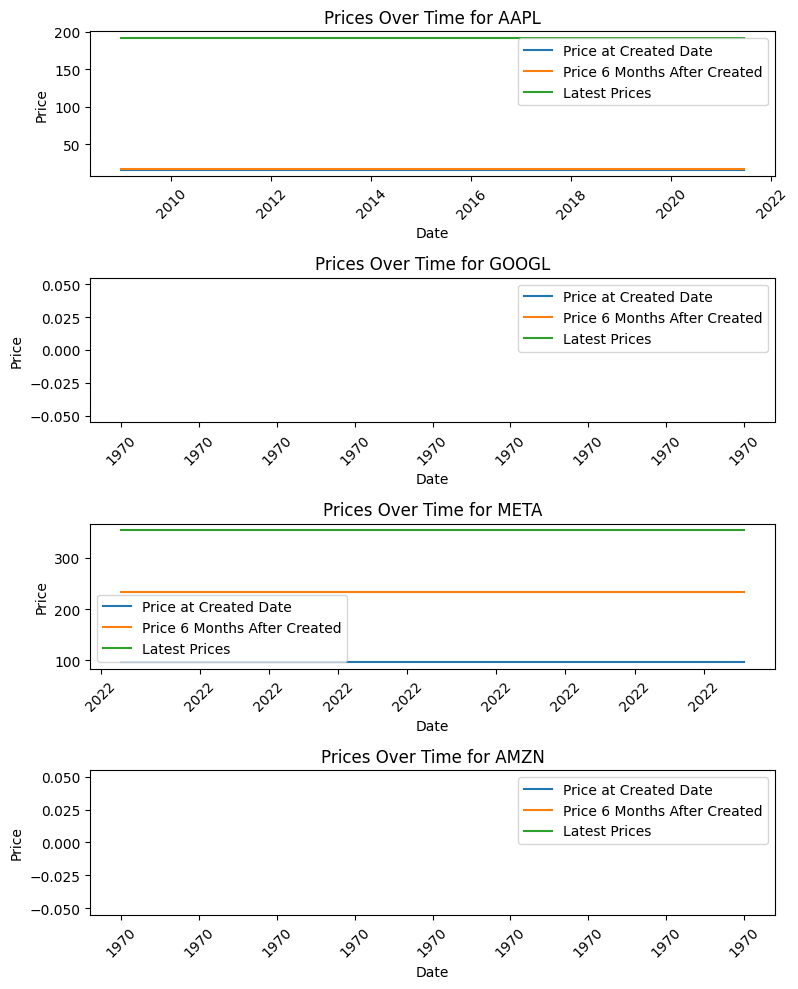

In [68]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the 'created' column is in datetime format
merged_final_df['created'] = pd.to_datetime(merged_final_df['created'])

# Specify the tickers you want to include in the plot
selected_tickers = ['AAPL', 'GOOGL', 'META', 'AMZN']

# Filter the merged_final_df DataFrame to include only the selected tickers
selected_data = merged_final_df[merged_final_df['symbol'].isin(selected_tickers)]

# Creating separate subplots for each ticker
fig, axes = plt.subplots(nrows=len(selected_tickers), ncols=1, figsize=(8, 10))

# Plotting prices for each ticker
for i, ticker in enumerate(selected_tickers):
    # Filter the data for the current ticker
    ticker_data = selected_data[selected_data['symbol'] == ticker]

    # Plotting price at created date
    axes[i].plot(ticker_data['created'], ticker_data['Price_at_created_date'], label='Price at Created Date')

    # Plotting price 6 months after created
    axes[i].plot(ticker_data['created'], ticker_data['Price_6_months_after'], label='Price 6 Months After Created')

    # Plotting latest prices
    axes[i].plot(ticker_data['created'], ticker_data['Latest_Price'], label='Latest Prices')

    # Adding labels and title
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'Prices Over Time for {ticker}')
    axes[i].legend()

    # Formatting x-axis to show only the year
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Rotating x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


## Sentiment Analysis

In [100]:
import pandas as pd
import openai
import time
import random

openai.api_key = 'sk-proj-VJi5TtniS5i2FAgLGTuiT3BlbkFJyBLhJVVjfsqGimbXqO36'

# Function to truncate thesis text to a manageable length in tokens
def truncate_text(text, max_tokens=15000):
    words = text.split()
    # Estimate tokens as 1.3 tokens per word
    max_words = int(max_tokens / 1.3)
    if len(words) > max_words:
        return ' '.join(words[:max_words])
    return text

# Function to generate a varied system message to avoid repetitive patterns error
def generate_system_message():
    variations = [
        "You are an expert financial analyst. The text provided is an investment thesis summary taken from the SumZero website. "
        "Based on the details, categorize its sentiment as 'bullish' (indicating a positive outlook and suggesting going long), "
        "'bearish' (indicating a negative outlook and suggesting going short), or 'neutral' (indicating an unclear or mixed outlook). "
        "Analyze the sentiment conveyed about the stock's future financial performance, market positioning, and any significant risks or opportunities mentioned. "
        "Consider the tone of the language, specific statements about future prospects, and any qualitative or quantitative data provided."
        "Also consider the following aspects if mentioned in the text in your analysis: "
        "1. Financial valuation metrics such as earnings, revenue, cash flow, and debt levels. "
        "2. Market conditions and expected changes in relevant factors such as demand, pricing, and macroeconomic trends. "
        "3. The company's management effectiveness and any involvement of influential investors or activists. "
        "4. Supply and demand dynamics affecting the company's industry and market position. "
        "5. Competitive landscape, including the company's market share, competitive advantages, and potential threats from new entrants or existing competitors. "
        "6. Any potential risks, opportunities, or counterpoints that could significantly impact the company's outlook.",
        
        "You are an expert financial analyst. The text provided is an investment thesis summary taken from the SumZero website. "
        "Based on the details, categorize its sentiment as 'bullish', 'bearish', or 'neutral'. Analyze the sentiment conveyed "
        "about the stock's future financial performance, market positioning, and any significant risks or opportunities mentioned.",

        "As a seasoned financial analyst, you are tasked with interpreting the sentiment of an investment thesis summary from SumZero. "
        "Determine if the sentiment is 'bullish', 'bearish', or 'neutral'. Consider the tone, specific statements about future prospects, "
        "and any qualitative or quantitative data provided.",

        "Evaluate the provided investment thesis summary from SumZero. Your role as an expert financial analyst is to categorize the sentiment "
        "as 'bullish', 'bearish', or 'neutral'. Assess the stock's future financial performance, market positioning, and any significant risks or opportunities mentioned."
    ]
    return random.choice(variations)

def interpret_thesis(thesis, retries=3):
    truncated_thesis = truncate_text(thesis)
    
    for attempt in range(retries):
        try:
            system_message = generate_system_message()
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": system_message},
                    {"role": "user", "content": truncated_thesis}
                ],
                temperature=0.2
            )
            content = response['choices'][0]['message']['content'].strip().lower()
            if "bullish" in content:
                return "bullish"
            elif "bearish" in content:
                return "bearish"
            else:
                return "neutral"  # Neutral or undetermined
        except openai.APIError as e:
            print(f"Error on attempt {attempt + 1} of {retries}: {e}")
            time.sleep(2 ** attempt)  # exponential backoff
        except Exception as e:
            print(f"Unhandled error: {e}")
            break  # Exit loop if an unexpected error occurs
    return None  # Return None if all attempts fail

In [106]:
# Convert 'thesis' column to string type
merged_final_df['thesis'] = merged_final_df['thesis'].astype(str)

df_final_1000 = merged_final_df.iloc[:500].copy()
df_final_1000['sentiment'] = df_final_1000['thesis'].apply(interpret_thesis)

Unhandled error: Sorry! We've encountered an issue with repetitive patterns in your prompt. Please try again with a different prompt.


In [107]:
df_final_1000

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment
0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish
1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish
2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish
3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish
4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,193d610f694a788845d73947f242a09f0d4d0500f1fab1...,2020-10-16 01:55:06,260.00,1,growth_at_reasonable_price,1551,c0ee02eba230026d9bc2dab6224d5562548ab744e99004...,QZ2Q0V-S-US,"Elevator History \nSTZ is a producer of beer, ...",US21036P1084,70.0,6.0,Hasn’t much of STM’s premium valuation been be...,373.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,0,0,0,0,1,0,STZ,US,141.044647,239.926651,180.417755,bullish
496,059ce313cbc42814e67feda9f9df369a2170c23d368bb7...,2009-10-12 20:56:28,72.00,1,value,533,70e89d1cfc66c40354bc4bcca47406e7ccf1d55d31e4f4...,GW5WZK-S-US,Basic thesis is as such: \n\n* \tCash cost fo...,US61945C1036,NaN,10.0,"Good analysis. Yes, new greenfield mines (@ $1...",1710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,MOS,US,26.660866,35.489819,19.746941,bullish
497,2aa7fd5061a634598d4818ec3e8df1a5e9530030bf12cb...,2010-05-25 01:16:40,66.81,1,growth_at_reasonable_price,617,a8bdeecd8ead68f055f4d1b63a115449568be9a7bd660e...,GW5WZK-S-US,OVERVIEW\nThe Mosaic Company (MOS) is one of t...,US61945C1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,442.0,4 (good) 4 (good) 4 (good) 4 (good) 4 (good) 4...,0,0,0,0,1,0,MOS,US,26.660866,35.489819,19.746941,bullish
498,4c8eb5f6f8df9a24c4f1bc60979fc12c114522b2d67f4f...,2011-11-16 23:37:41,90.00,1,growth_at_reasonable_price,564,207bd55588c52d19f0311688526d902ba06e983b64faf0...,GW5WZK-S-US,The Mosaic Company (MOS) is the fourth largest...,US61945C1036,NaN,4.0,Your thesis would benefit if you would discuss...,270.0,NaN,NaN,NaN,NaN,NaN,2.0,410.0,-200 -20

In [108]:
# Find the index of the first occurrence of "None" in the 'sentiment' column
first_none_index = df_final_1000[df_final_1000['sentiment'].isnull()].index.min()

print("Index of first 'None' in the sentiment column:", first_none_index)


Index of first 'None' in the sentiment column: 265


In [112]:
df_next_500 = merged_final_df.iloc[500:1000].copy()
df_next_500['sentiment'] = df_next_500['thesis'].apply(interpret_thesis)

Unhandled error: Sorry! We've encountered an issue with repetitive patterns in your prompt. Please try again with a different prompt.
Unhandled error: This model's maximum context length is 16385 tokens. However, your messages resulted in 17207 tokens. Please reduce the length of the messages.


In [113]:
df_next_500

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment
500,f43ce7e20ddb5a017fb4e69145eddd560ef631d70c8211...,2013-08-27 20:18:52,50.0,1,value,2049,984b2eb0e7caeb789cfaa52d374ba0ebba37567dd8bd21...,GW5WZK-S-US,Fertilizer stocks plummeted on July 30th on th...,US61945C1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,0,0,1,0,0,0,MOS,US,26.660866,35.489819,19.746941,bullish
501,9a1ccaa2a80872f004a1f34f6404ee28bd20560b920cdb...,2013-10-30 04:17:22,58.0,1,event_/_special_situations,673,b06b96db00a36b1b29995fec02520d230c4c21b2615390...,GW5WZK-S-US,"LONG - THE MOSAIC CO. (NYSE: MOS, $41.19) - 3 ...",US61945C1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,0,0,1,0,0,0,MOS,US,26.660866,35.489819,19.746941,bullish
502,211f5436894a6dc3c0310af93d1293c656119dd4c8b7e6...,2013-12-20 02:04:46,65.0,1,value,562,5537348f34ce1795349ee7a9180fd2ae4e72586dca6940...,GW5WZK-S-US,Recommendation Summary: \n\nThe Mosaic Company...,US61945C1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,1.0,NaN,0,0,0,0,1,0,MOS,US,26.660866,35.489819,19.746941,bullish
503,051b6520140f3f640c7c4c7aee3fd135ba7261086e90b0...,2016-01-26 05:33:27,45.0,1,value,1920,b692b25899c56a25b4a08dcd629ee1a44dfc1c73a2a500...,GW5WZK-S-US,Long – Mosaic Co.(MOS)\nNote: Please reference...,US61945C1036,118.0,4.0,Uralkali seems dead-set on hitting max capacit...,268.0,2.0,<p>After a small rally resulting from depresse...,94.0,value value,10.0,NaN,NaN,NaN,0,0,1,0,0,0,MOS,US,26.660866,35.489819,19.746941,bullish
504,441b3bbc30d6cd91a65670967da0eca871530cf90a944c...,2021-08-11 19:05:20,65.0,1,value,3238,742c9c8f09800863d0b686efe439d974f0cac6ff39f4b6...,GW5WZK-S-US,nan,US61945C1036,45.0,2.0,Good report. A forgotten stealth play on commo...,61.0,NaN,NaN,NaN,NaN,10.0,NaN,1.0,Bullish,0,0,0,1,0,0,MOS,US,26.660866,35.489819,19.746941,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88dc3c1bcf6a182df742f7b2f19126e772065cd7aadb66...,2019-04-17 23:45:39,125.0,1,growth,3637,88124524d6d7988cd7c39c4f7cc1841c5d1659a387b970...,XKV56X-S-US,"Skyworks Solutions, Inc. (SWKS) Investment Cas...",US83088M1027,488.0,8.0,Thanks for the writeup and idea. After all is ...,360.0,NaN,NaN,NaN,NaN,6.0,196.0,NaN,NaN,0,0,0,1,0,0,SWKS,US,127.052246,110.884583,154.588074,bullish
996,1cd0341956ff78d4fc5a1e6f690949df54c4abc80c2016...,2015-10-27 15:26:35,1200.0,1,other,3969,842d5278a6bf3e472829bb16723b075662991e36d219ed...,DC1QVX-S-US,​Company Analysis Alphabet Inc – GOOGL US Equi...,US02079K1079,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish
997,c2794f15e76ea34868df4e0841a80ff3b21dd0be7dc5f8...,2017-05-10 19:00:23,2000.0,1,growth_at_reasonable_price,5287,daa5efccbfd87cd724c350a34253de5aa41ae800e9a4b6...,DC1QVX-S-US,NB: Tables and figures in the formatted report...,US02079K1079,776.0,24.0,Somehow I managed to leave out my concluding r...,1352.0,NaN,NaN,NaN,NaN,10.0,416.0,457.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish
998,81fb2f1b92c9c70384152a809867ac4b66eb233cfdab67...,2017-11-07 01:35:39,1350.0,1,growth_at_reasonable_price,5606,ad9f38114b9fead1ac162e952a4664023775299bf52a4a...,DC1QVX-S-US,PLEASE SEE PDF VERSION AND EXCEL FINANCIAL MOD...,US02079K1079,244.0,22.0,How is your view any different from the consen...,3344.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bu

In [114]:
# Find the index of the first occurrence of "None" in the 'sentiment' column
none_index = df_next_500[df_next_500['sentiment'].isnull()].index.min()

print("Index of first 'None' in the sentiment column:", none_index)

Index of first 'None' in the sentiment column: 797


In [116]:
df_next_500[df_next_500['sentiment'].isnull()]

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment
797,24982a7ef6b7ef81dc52280343fce83c89228a8d65a07f...,2013-08-02 07:27:27,487.0,1,value,500,99204dfe1a9f3863c1ecf8e22a716300d59bc65e1d4929...,KX8CBL-S-GB,Idea closed.Idea closed.Idea closed.Idea close...,GB00BLGZ9862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,TSCO,LN,92.403664,213.212036,84.669411,None
903,f4bd4ac72afcac9a39592e7fba7c85f8e32f2dbc0a76f6...,2015-01-27 00:29:05,63.0,1,value,11532,73b19c9e35d4d970c24681dfbaa7534c8dda867e9bd310...,HVVK2Q-S-US,We are initiating coverage of Oracle Corporati...,US68389X1054,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,714.0,NaN,NaN,0,0,0,1,0,0,ORCL,US,42.934555,104.685226,56.390717,None


In [117]:
# Concatenate the DataFrames
df_combined = pd.concat([df_final_1000, df_next_500], axis=0)

# Verify the result
df_combined.shape  # Should print (1000, number_of_columns)

(1000, 34)

In [118]:
df_combined

,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment
0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish
1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish
2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish
3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish
4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88dc3c1bcf6a182df742f7b2f19126e772065cd7aadb66...,2019-04-17 23:45:39,125.00,1,growth,3637,88124524d6d7988cd7c39c4f7cc1841c5d1659a387b970...,XKV56X-S-US,"Skyworks Solutions, Inc. (SWKS) Investment Cas...",US83088M1027,488.0,8.0,Thanks for the writeup and idea. After all is ...,360.0,NaN,NaN,NaN,NaN,6.0,196.0,NaN,NaN,0,0,0,1,0,0,SWKS,US,127.052246,110.884583,154.588074,bullish
996,1cd0341956ff78d4fc5a1e6f690949df54c4abc80c2016...,2015-10-27 15:26:35,1200.00,1,other,3969,842d5278a6bf3e472829bb16723b075662991e36d219ed...,DC1QVX-S-US,​Company Analysis Alphabet Inc – GOOGL US Equi...,US02079K1079,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish
997,c2794f15e76ea34868df4e0841a80ff3b21dd0be7dc5f8...,2017-05-10 19:00:23,2000.00,1,growth_at_reasonable_price,5287,daa5efccbfd87cd724c350a34253de5aa41ae800e9a4b6...,DC1QVX-S-US,NB: Tables and figures in the formatted report...,US02079K1079,776.0,24.0,Somehow I managed to leave out my concluding r...,1352.0,NaN,NaN,NaN,NaN,10.0,416.0,457.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish
998,81fb2f1b92c9c70384152a809867ac4b66eb233cfdab67...,2017-11-07 01:35:39,1350.00,1,growth_at_reasonable_price,5606,ad9f38114b9fead1ac162e952a4664023775299bf52a4a...,DC1QVX-S-US,PLEASE SEE PDF VERSION AND EXCEL FINANCIAL MOD...,US02079K1079,244.0,22.0,How is your view any different from the consen...,3344.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,Na

In [119]:
df_combined.to_csv("df_with_sentiment")

In [173]:
# Filter rows where 'symbol2' column contains 'US'
df_combined = pd.read_csv("df_with_sentiment")

### Entry Date (3 Weeks after Thesis / Idea is created)

In [174]:
from datetime import timedelta

# Convert timeline columns to holding periods in months
timeline_to_months = {
    'time_less_than_3_months': 1,
    'time_3_months_to_6_months': 3,
    'time_6_months_to_1_year': 6,
    'time_1_year_to_2_years': 12,
    'time_2_years_to_5_years': 24,
    'time_more_than_5_years': 60
}

# Add 3 weeks to the creation date to get the entry date
df_combined['entry_date'] = pd.to_datetime(df_combined['created']) + timedelta(weeks=3)

In [175]:
df_combined.head()

,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date
0,0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2008-04-09 19:14:27
1,1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2011-12-23 00:58:34
2,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23 12:09:11
3,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23 03:54:17
4,4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish,2011-12-22 10:24:30


### Generating Signals as Per the Sentiment

In [176]:
# Function to generate signals based on sentiment
def generate_signals(df):
    df_combined['signal'] = np.where(df_combined['sentiment'] == 'bullish', 1, 
                            np.where(df_combined['sentiment'] == 'bearish', -1, 0))
    return df_combined


In [177]:
import numpy as np
generate_signals(df_combined)

,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date,signal
0,0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2008-04-09 19:14:27,1
1,1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2011-12-23 00:58:34,1
2,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23 12:09:11,1
3,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23 03:54:17,1
4,4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish,2011-12-22 10:24:30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,88dc3c1bcf6a182df742f7b2f19126e772065cd7aadb66...,2019-04-17 23:45:39,125.00,1,growth,3637,88124524d6d7988cd7c39c4f7cc1841c5d1659a387b970...,XKV56X-S-US,"Skyworks Solutions, Inc. (SWKS) Investment Cas...",US83088M1027,488.0,8.0,Thanks for the writeup and idea. After all is ...,360.0,NaN,NaN,NaN,NaN,6.0,196.0,NaN,NaN,0,0,0,1,0,0,SWKS,US,127.052246,110.884583,154.588074,bullish,2019-05-08 23:45:39,1
996,996,1cd0341956ff78d4fc5a1e6f690949df54c4abc80c2016...,2015-10-27 15:26:35,1200.00,1,other,3969,842d5278a6bf3e472829bb16723b075662991e36d219ed...,DC1QVX-S-US,​Company Analysis Alphabet Inc – GOOGL US Equi...,US02079K1079,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish,2015-11-17 15:26:35,1
997,997,c2794f15e76ea34868df4e0841a80ff3b21dd0be7dc5f8...,2017-05-10 19:00:23,2000.00,1,growth_at_reasonable_price,5287,daa5efccbfd87cd724c350a34253de5aa41ae800e9a4b6...,DC1QVX-S-US,NB: Tables and figures in the formatted report...,US02079K1079,776.0,24.0,Somehow I managed to leave out my concluding r...,1352.0,NaN,NaN,NaN,NaN,10.0,416.0,457.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish,2017-05-31 19:00:23,1
998,998,81fb2f1b92c9c70384152a809867ac4b66eb233cfdab67...,2017-11-07 01:35:39,1350.00,1,growth_at_rea

### Trading Strategy 

#### Getting entry and exit dates

In [178]:
# Extract only the date part
df_combined['entry_date'] = df_combined['entry_date'].dt.date


In [179]:
# Convert timeline columns to holding periods in months
timeline_to_months = {
    'time_less_than_3_months': 1,
    'time_3_months_to_6_months': 3,
    'time_6_months_to_1_year': 6,
    'time_1_year_to_2_years': 12,
    'time_2_years_to_5_years': 24,
    'time_more_than_5_years': 60
}

# Iterate over each row
for index, row in df_combined.iterrows():
    exit_date = None
    # Iterate over each timeline column
    for timeline_col, months in timeline_to_months.items():
        # Check if the timeline column value is 1
        if row[timeline_col] == 1:
            # Add the corresponding number of months to the entry date
            exit_date = row['entry_date'] + pd.DateOffset(months=months)
            # Convert to date format
            exit_date = exit_date.date()
            break  # Exit the loop once exit date is found
    # Update the exit_dates column with the calculated exit date
    df_combined.at[index, 'exit_dates'] = exit_date

# Display the DataFrame with exit dates
print(df_combined[['entry_date', 'exit_dates']])


     entry_date  exit_dates
0    2008-04-09  2009-04-09
1    2011-12-23  2012-12-23
2    2008-04-23  2008-10-23
3    2010-06-23  2010-09-23
4    2011-12-22  2013-12-22
..          ...         ...
995  2019-05-08  2020-05-08
996  2015-11-17  2017-11-17
997  2017-05-31  2019-05-31
998  2017-11-28  2019-11-28
999  2021-01-14  2022-01-14

[1000 rows x 2 columns]


C:\Users\akudu\AppData\Local\Temp\ipykernel_32320\2967875939.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2009-04-09' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_combined.at[index, 'exit_dates'] = exit_date


In [180]:
df_combined

,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date,signal,exit_dates
0,0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2008-04-09,1,2009-04-09
1,1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2011-12-23,1,2012-12-23
2,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23,1,2008-10-23
3,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23,1,2010-09-23
4,4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish,2011-12-22,1,2013-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,88dc3c1bcf6a182df742f7b2f19126e772065cd7aadb66...,2019-04-17 23:45:39,125.00,1,growth,3637,88124524d6d7988cd7c39c4f7cc1841c5d1659a387b970...,XKV56X-S-US,"Skyworks Solutions, Inc. (SWKS) Investment Cas...",US83088M1027,488.0,8.0,Thanks for the writeup and idea. After all is ...,360.0,NaN,NaN,NaN,NaN,6.0,196.0,NaN,NaN,0,0,0,1,0,0,SWKS,US,127.052246,110.884583,154.588074,bullish,2019-05-08,1,2020-05-08
996,996,1cd0341956ff78d4fc5a1e6f690949df54c4abc80c2016...,2015-10-27 15:26:35,1200.00,1,other,3969,842d5278a6bf3e472829bb16723b075662991e36d219ed...,DC1QVX-S-US,​Company Analysis Alphabet Inc – GOOGL US Equi...,US02079K1079,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish,2015-11-17,1,2017-11-17
997,997,c2794f15e76ea34868df4e0841a80ff3b21dd0be7dc5f8...,2017-05-10 19:00:23,2000.00,1,growth_at_reasonable_price,5287,daa5efccbfd87cd724c350a34253de5aa41ae800e9a4b6...,DC1QVX-S-US,NB: Tables and figures in the formatted report...,US02079K1079,776.0,24.0,Somehow I managed to leave out my concluding r...,1352.0,NaN,NaN,NaN,NaN,10.0,416.0,457.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish,2017-05-31,1,2019-05-31
998,998,81fb2f1b92c9c70384152a809867ac4b66eb233cfdab67...,2017-11-07 0

#### Retrieve Prices based on Timelines

In [181]:
# Convert the 'entry_date' column in df_combined to datetime64[ns]
df_combined['entry_date'] = pd.to_datetime(df_combined['entry_date'])

# Merge df_combined with matching_data_melted based on symbol and entry_date
merged_entry = df_combined.merge(matching_data_melted, left_on=['symbol', 'entry_date'], right_on=['Ticker', 'Date'], how='left')

# Store the entry prices in df_combined
df_combined['entry_price'] = merged_entry['Price']

# Display the resulting DataFrame with entry prices
print(df_combined[['entry_date', 'entry_price']])

# Convert the 'entry_date' column in df_combined to datetime64[ns]
df_combined['exit_dates'] = pd.to_datetime(df_combined['exit_dates'])

# Merge df_combined with matching_data_melted based on symbol and entry_date
merged_entry = df_combined.merge(matching_data_melted, left_on=['symbol', 'exit_dates'], right_on=['Ticker', 'Date'], how='left')

# Store the entry prices in df_combined
df_combined['exit_price'] = merged_entry['Price']

# Display the resulting DataFrame with entry prices
print(df_combined[['exit_dates', 'exit_price']])



    entry_date  entry_price
0   2008-04-09          NaN
1   2011-12-23          NaN
2   2008-04-23    21.312855
3   2010-06-23     9.603377
4   2011-12-22    20.950279
..         ...          ...
995 2019-05-08    75.735298
996 2015-11-17    36.264999
997 2017-05-31    48.243000
998 2017-11-28    52.370499
999 2021-01-14    87.009003

[1000 rows x 2 columns]
    exit_dates  exit_price
0   2009-04-09         NaN
1   2012-12-23         NaN
2   2008-10-23    6.421233
3   2010-09-23   14.380544
4   2013-12-22         NaN
..         ...         ...
995 2020-05-08  102.206055
996 2017-11-17   50.954498
997 2019-05-31   55.181499
998 2019-11-28         NaN
999 2022-01-14  139.786499

[1000 rows x 2 columns]


In [182]:
df_combined.head()

,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date,signal,exit_dates,entry_price,exit_price
0,0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2008-04-09,1,2009-04-09,NaN,NaN
1,1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2011-12-23,1,2012-12-23,NaN,NaN
2,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23,1,2008-10-23,21.312855,6.421233
3,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23,1,2010-09-23,9.603377,14.380544
4,4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish,2011-12-22,1,2013-12-22,20.950279,NaN


### Calculating Returns

In [183]:
# Function to calculate returns
def calculate_returns(entry_price, exit_price):
    return (exit_price - entry_price) / entry_price


### Trading Strategy Function With Stop Loss

- if sentiment = 1, then we hold till the exit date 
- if sentiment = -1, stop loss (exit price < entry price)
we will continue holding till the exit date
- if it's 0, then also we will hold till the eit date

In [184]:
def create_trading_strategy(df):
    # Initialize an empty list to store strategy returns
    strat_returns = []

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Check the sentiment
        if row['sentiment'] == 1:  # Bullish sentiment
            # Hold the stock until the exit date
            if pd.isnull(row['exit_dates']):
                # If exit date is missing, append None to indicate no returns
                strat_returns.append(None)
            else:
                # Calculate returns based on exit price and entry price
                returns = (row['exit_price'] - row['entry_price']) / row['entry_price']
                strat_returns.append(returns)
        elif row['sentiment'] == -1:  # Bearish sentiment
            # Hold the stock until the exit price falls below the entry price or until the exit date
            if row['exit_price'] < row['entry_price']:
                # Calculate returns based on exit price and entry price
                returns = (row['exit_price'] - row['entry_price']) / row['entry_price']
                strat_returns.append(returns)
            elif pd.notnull(row['exit_dates']):  # If exit date is not null
                # Calculate returns based on exit price and entry price
                returns = (row['exit_price'] - row['entry_price']) / row['entry_price']
                strat_returns.append(returns)
            else:
                # If exit price is not lower than entry price and exit date is null, append None
                strat_returns.append(None)
        else:  # Neutral sentiment
            # Hold the stock until the exit date
            if pd.isnull(row['exit_dates']):
                # If exit date is missing, append None to indicate no returns
                strat_returns.append(None)
            else:
                # Calculate returns based on exit price and entry price
                returns = (row['exit_price'] - row['entry_price']) / row['entry_price']
                strat_returns.append(returns)

    # Add the strategy returns as a new column in the DataFrame
    df['strat_returns'] = strat_returns

    # Return the updated DataFrame with the strategy returns column added
    return df


In [185]:
def calculate_cumulative_returns(df):
    # Calculate daily returns
    df['daily_returns'] = df['strat_returns'] + 1

    # Calculate cumulative returns
    df['cumulative_returns'] = df['daily_returns'].cumprod() - 1
    
    # Convert cumulative returns to percentages
    df['cumulative_returns'] = df['cumulative_returns'] * 100

    return df


In [186]:
# Function to calculate annualized returns
def calculate_annualized_returns(returns, holding_period):
    annualized_returns = ((1 + returns) ** (1 / holding_period)) - 1
    return annualized_returns

### Train Test Split

In [187]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_combined[['symbol','entry_price', 'exit_price', 'sentiment', 'entry_date', 'exit_dates']]  # Use appropriate features
y = df_combined['signal']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 6)
X_test shape: (200, 6)
y_train shape: (800,)
y_test shape: (200,)


In [188]:
# Apply the trading strategy function to the training dataset (X_train)
df_train_strategy = create_trading_strategy(X_train)

# Calculate cumulative returns for the training dataset
df_train_strategy = calculate_cumulative_returns(df_train_strategy)

# Display the DataFrame with strategy returns and cumulative returns for the training dataset
df_train_strategy.head()

,symbol,entry_price,exit_price,sentiment,entry_date,exit_dates,strat_returns,daily_returns,cumulative_returns
29,NRG,11.746410,NaN,bullish,2012-05-31,2014-05-31,NaN,NaN,NaN
535,T,11.314361,13.017799,bearish,2014-02-27,2015-02-27,0.150555,1.150555,15.055546
695,CB,NaN,56.956825,bullish,2011-02-13,2012-02-13,NaN,NaN,NaN
557,DE,45.711014,NaN,bullish,2010-03-26,2011-03-26,NaN,NaN,NaN
836,SCHW,42.235340,NaN,bullish,2019-05-08,2021-05-08,NaN,NaN,NaN


In [189]:
df_train_strategy

,symbol,entry_price,exit_price,sentiment,entry_date,exit_dates,strat_returns,daily_returns,cumulative_returns
29,NRG,11.746410,NaN,bullish,2012-05-31,2014-05-31,NaN,NaN,NaN
535,T,11.314361,13.017799,bearish,2014-02-27,2015-02-27,0.150555,1.150555,1.505555e+01
695,CB,NaN,56.956825,bullish,2011-02-13,2012-02-13,NaN,NaN,NaN
557,DE,45.711014,NaN,bullish,2010-03-26,2011-03-26,NaN,NaN,NaN
836,SCHW,42.235340,NaN,bullish,2019-05-08,2021-05-08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
106,LYV,38.470001,NaN,bullish,2020-04-15,2022-04-15,NaN,NaN,NaN
270,QCOM,34.044327,44.659737,bullish,2011-08-23,2012-08-23,0.311811,1.311811,7.448261e+33
860,SBAC,64.426826,94.371513,bearish,2013-02-20,2014-02-20,0.464786,1.464786,1.091011e+34
435,FICO,23.395750,22.783798,bullish,2009-08-27,2010-08-27,-0.026157,0.973843,1.062474e+34


In [190]:
# Calculate holding period for each trade in years
df_train_strategy['holding_period'] = (df_train_strategy['exit_dates'] - df_train_strategy['entry_date']).dt.days / 365

# Calculate annualized returns for each trade
df_train_strategy['annualized_returns'] = calculate_annualized_returns(df_train_strategy['strat_returns'], df_train_strategy['holding_period'])

# Calculate the mean annualized returns
mean_annualized_return = np.mean(df_train_strategy['annualized_returns'])

print("Mean Annualized Return:", mean_annualized_return)

Mean Annualized Return: 0.29318889086384736


In [191]:
df_train_strategy.head()

,symbol,entry_price,exit_price,sentiment,entry_date,exit_dates,strat_returns,daily_returns,cumulative_returns,holding_period,annualized_returns
29,NRG,11.746410,NaN,bullish,2012-05-31,2014-05-31,NaN,NaN,NaN,2.00000,NaN
535,T,11.314361,13.017799,bearish,2014-02-27,2015-02-27,0.150555,1.150555,15.055546,1.00000,0.150555
695,CB,NaN,56.956825,bullish,2011-02-13,2012-02-13,NaN,NaN,NaN,1.00000,NaN
557,DE,45.711014,NaN,bullish,2010-03-26,2011-03-26,NaN,NaN,NaN,1.00000,NaN
836,SCHW,42.235340,NaN,bullish,2019-05-08,2021-05-08,NaN,NaN,NaN,2.00274,NaN


In [192]:
# Apply the trading strategy function to the training dataset (X_train)
df_test_strategy = create_trading_strategy(X_test)

# Calculate cumulative returns for the training dataset
df_test_strategy = calculate_cumulative_returns(df_test_strategy)

# Display the DataFrame with strategy returns and cumulative returns for the training dataset
df_test_strategy.head()

,symbol,entry_price,exit_price,sentiment,entry_date,exit_dates,strat_returns,daily_returns,cumulative_returns
521,BX,6.438899,NaN,bullish,2009-11-27,2011-11-27,NaN,NaN,NaN
737,TTWO,18.240000,29.6700,bullish,2014-01-27,2015-01-27,0.626645,1.626645,62.664476
740,GOOGL,28.169500,35.7435,bullish,2015-06-23,2016-06-23,0.268872,1.268872,106.400454
660,GPN,NaN,NaN,bullish,2018-07-04,2019-07-04,NaN,NaN,NaN
411,TXT,NaN,NaN,bullish,2014-07-04,2015-07-04,NaN,NaN,NaN


In [193]:
df_test_strategy

,symbol,entry_price,exit_price,sentiment,entry_date,exit_dates,strat_returns,daily_returns,cumulative_returns
521,BX,6.438899,NaN,bullish,2009-11-27,2011-11-27,NaN,NaN,NaN
737,TTWO,18.240000,29.670000,bullish,2014-01-27,2015-01-27,0.626645,1.626645,6.266448e+01
740,GOOGL,28.169500,35.743500,bullish,2015-06-23,2016-06-23,0.268872,1.268872,1.064005e+02
660,GPN,NaN,NaN,bullish,2018-07-04,2019-07-04,NaN,NaN,NaN
411,TXT,NaN,NaN,bullish,2014-07-04,2015-07-04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
408,WY,19.858477,NaN,bullish,2013-03-21,2013-09-21,NaN,NaN,NaN
332,PFE,9.668731,NaN,bullish,2010-02-26,2012-02-26,NaN,NaN,NaN
208,AAPL,17.633121,NaN,bullish,2012-04-30,2012-10-30,NaN,NaN,NaN
613,WDC,41.493164,72.178940,bullish,2016-03-28,2017-03-28,0.739538,1.739538,2.942464e+10


In [228]:
# Calculate holding period for each trade in years
df_test_strategy['holding_period'] = (df_test_strategy['exit_dates'] - df_test_strategy['entry_date']).dt.days / 365

# Calculate annualized returns for each trade
df_test_strategy['annualized_returns'] = calculate_annualized_returns(df_test_strategy['strat_returns'], df_test_strategy['holding_period'])

# Calculate the mean annualized returns
mean_annualized_return = np.mean(df_test_strategy['annualized_returns'])

print("Mean Annualized Return:", mean_annualized_return)

Mean Annualized Return: 0.497378172309743


In [195]:
df_test_strategy.head()

,symbol,entry_price,exit_price,sentiment,entry_date,exit_dates,strat_returns,daily_returns,cumulative_returns,holding_period,annualized_returns
521,BX,6.438899,NaN,bullish,2009-11-27,2011-11-27,NaN,NaN,NaN,2.00000,NaN
737,TTWO,18.240000,29.6700,bullish,2014-01-27,2015-01-27,0.626645,1.626645,62.664476,1.00000,0.626645
740,GOOGL,28.169500,35.7435,bullish,2015-06-23,2016-06-23,0.268872,1.268872,106.400454,1.00274,0.268047
660,GPN,NaN,NaN,bullish,2018-07-04,2019-07-04,NaN,NaN,NaN,1.00000,NaN
411,TXT,NaN,NaN,bullish,2014-07-04,2015-07-04,NaN,NaN,NaN,1.00000,NaN


### Apply on Full Dataset

In [196]:
# Calculate returns for each row
df_combined['returns'] = calculate_returns(df_combined['entry_price'], df_combined['exit_price'])

In [197]:
# Apply the trading strategy function to the df_combined DataFrame
df_strategy = create_trading_strategy(df_combined)
df_strategy.head()

,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date,signal,exit_dates,entry_price,exit_price,returns,strat_returns
0,0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2008-04-09,1,2009-04-09,NaN,NaN,NaN,NaN
1,1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2011-12-23,1,2012-12-23,NaN,NaN,NaN,NaN
2,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23,1,2008-10-23,21.312855,6.421233,-0.698715,-0.698715
3,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23,1,2010-09-23,9.603377,14.380544,0.497446,0.497446
4,4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish,2011-12-22,1,2013-12-22,20.950279,NaN,NaN,NaN


In [198]:

# Apply the function to calculate cumulative returns
df_strategy = calculate_cumulative_returns(df_strategy)
df_strategy

,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date,signal,exit_dates,entry_price,exit_price,returns,strat_returns,daily_returns,cumulative_returns
0,0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2008-04-09,1,2009-04-09,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2011-12-23,1,2012-12-23,NaN,NaN,NaN,NaN,NaN,NaN
2,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23,1,2008-10-23,21.312855,6.421233,-0.698715,-0.698715,0.301285,-6.987155e+01
3,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23,1,2010-09-23,9.603377,14.380544,0.497446,0.497446,1.497446,-5.488426e+01
4,4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish,2011-12-22,1,2013-12-22,20.950279,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,88dc3c1bcf6a182df742f7b2f19126e772065cd7aadb66...,2019-04-17 23:45:39,125.00,1,growth,3637,88124524d6d7988cd7c39c4f7cc1841c5d1659a387b970...,XKV56X-S-US,"Skyworks Solutions, Inc. (SWKS) Investment Cas...",US83088M1027,488.0,8.0,Thanks for the writeup and idea. After all is ...,360.0,NaN,NaN,NaN,NaN,6.0,196.0,NaN,NaN,0,0,0,1,0,0,SWKS,US,127.052246,110.884583,154.588074,bullish,2019-05-08,1,2020-05-08,75.735298,102.206055,0.349517,0.349517,1.349517,3.307365e+42
996,996,1cd0341956ff78d4fc5a1e6f690949df54c4abc80c2016...,2015-10-27 15:26:35,1200.00,1,other,3969,842d5278a6bf3e472829bb16723b075662991e36d219ed...,DC1QVX-S-US,​Company Analysis Alphabet Inc – GOOGL US Equi...,US02079K1079,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0,0,0,0,1,0,GOOG,US,88.850998,140.929993,113.098503,bullish,2015-11-17,1,2017-11-17,36.264999,50.954498,0.405060,0.405060,1.405060,4.647046e+42
997,997,c2794f15e76ea34868df4e0841a80ff3b21dd0be7dc5f8...,2017-05-10 19:00:23,2000.00,1,growth_at_reasonable_price,5287,daa5efc

In [199]:
# Calculate holding period for each trade in years
df_strategy['holding_period'] = (df_strategy['exit_dates'] - df_strategy['entry_date']).dt.days / 365

# Calculate annualized returns for each trade
df_strategy['annualized_returns'] = calculate_annualized_returns(df_strategy['strat_returns'], df_strategy['holding_period'])

# Calculate the mean annualized returns
mean_annualized_return = np.mean(df_strategy['annualized_returns'])

print("Mean Annualized Return:", mean_annualized_return)

Mean Annualized Return: 0.3330393033049289


In [200]:
df_strategy.head()

,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date,signal,exit_dates,entry_price,exit_price,returns,strat_returns,daily_returns,cumulative_returns,holding_period,annualized_returns
0,0,c3720b55a07f92c50eacef9e64b327868ab6967f4150b7...,2008-03-19 19:14:27,60.00,1,event_/_special_situations,198,286f21e021519cec905484344fa72405ce194d59520341...,M6459C-S-US,IR is a mid/large cap industrial that investor...,IE00BK9ZQ967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2008-04-09,1,2009-04-09,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
1,1,8a1f060a782d8b15eee98573485cf666f24d7f0a9a18d9...,2011-12-02 00:58:34,50.00,1,value,548,160a4b7a66398d0a08271be1bbccf63d8ca2f781b5bcb9...,M6459C-S-US,"Hardly an original name, but we currently like...",IE00BK9ZQ967,NaN,2.0,Hi Lee - thanks for the idea. What do you thi...,88.0,NaN,NaN,NaN,NaN,NaN,287.0,4594.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,0,0,0,1,0,0,IR,US,NaN,77.305901,NaN,bullish,2011-12-23,1,2012-12-23,NaN,NaN,NaN,NaN,NaN,NaN,1.002740,NaN
2,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.00,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23,1,2008-10-23,21.312855,6.421233,-0.698715,-0.698715,0.301285,-69.871548,0.501370,-0.908631
3,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.00,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23,1,2010-09-23,9.603377,14.380544,0.497446,0.497446,1.497446,-54.884256,0.252055,3.962349
4,4,3e6ecfc67ba5258ad4d41ba76d4bb383b333451613f26e...,2011-12-01 10:24:30,171.59,1,value,555,47e7744e99f36c6ea60535bf91fe17d5d5ff1a9c0f4f0d...,D52CVG-S-US,SUMMARY\n\nCF Industries supplies 24% of the n...,US1252691001,NaN,4.0,Hi Michael - Could you please explain what you...,712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,CF,US,12.776163,78.452087,10.484786,bullish,2011-12-22,1,2013-12-22,20.950279,NaN,NaN,NaN,NaN,NaN,2.002740,NaN


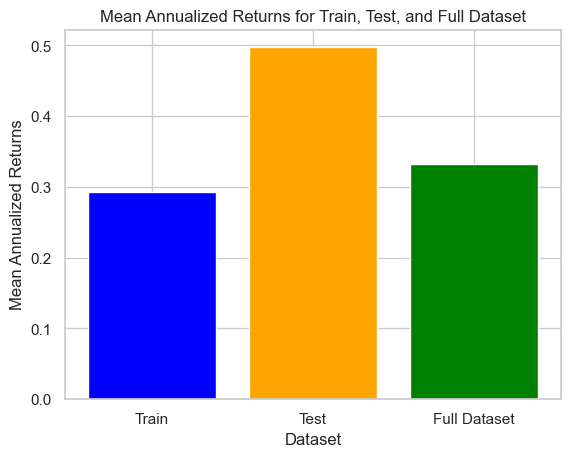

In [201]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean annualized return for train, test, and full dataset
mean_annualized_return_train = np.mean(df_train_strategy['annualized_returns'])
mean_annualized_return_test = np.mean(df_test_strategy['annualized_returns'])
mean_annualized_return_full = np.mean(df_strategy['annualized_returns'])

# Plotting
labels = ['Train', 'Test', 'Full Dataset']
mean_annualized_returns = [mean_annualized_return_train, mean_annualized_return_test, mean_annualized_return_full]

plt.bar(labels, mean_annualized_returns, color=['blue', 'orange', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Mean Annualized Returns')
plt.title('Mean Annualized Returns for Train, Test, and Full Dataset')
plt.show()


## Portfolio Creation
To ensure that each stock symbol is unique in your portfolio, you can group the dataframe by the stock symbol and take the row with the highest annualized return for each stock. After filtering for unique stocks, you can then proceed with the weighting and portfolio calculations.

In [211]:
# Drop rows with NaN values in 'entry_price' and 'exit_price' columns
df_strategy.dropna(subset=['entry_price', 'exit_price'], inplace=True)

# Reset the index after dropping rows
df_strategy.reset_index(drop=True, inplace=True)

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_strategy is your original dataframe

# Group by stock symbol and take the row with the highest annualized return for each stock
df_unique = df_strategy.loc[df_strategy.groupby('symbol')['annualized_returns'].idxmax()]

# Filter stocks with more than 20 comments
df_filtered = df_unique[df_unique['number_comments'] > 20]

# Sort the stocks by their annualized returns in descending order
df_sorted = df_unique.sort_values(by='annualized_returns', ascending=False)

# Define weights based on annualized returns
# Normalize annualized returns to use as weights
df_sorted['weight'] = df_sorted['annualized_returns'] / df_sorted['annualized_returns'].sum()

# Select top performing stocks (top 10 for this example)
top_stocks = df_sorted.head(15)

# Calculate Portfolio Returns: Weighted average of top stocks' returns
portfolio_return = np.sum(top_stocks['annualized_returns'] * top_stocks['weight'])

print("Selected Top Stocks for Portfolio:")
print(top_stocks[['symbol', 'annualized_returns', 'weight', 'entry_date', 'exit_dates']])
print("Portfolio Annualized Return:", portfolio_return)


Selected Top Stocks for Portfolio:
    symbol  annualized_returns    weight entry_date exit_dates
443   TSLA           27.684259  0.188173 2020-12-11 2021-01-11
232    TXT           13.642895  0.092732 2009-06-30 2009-09-30
193    JPM            4.936709  0.033555 2009-04-14 2009-05-14
148    STT            4.525363  0.030759 2009-03-16 2009-09-16
1       CF            3.962349  0.026933 2010-06-23 2010-09-23
90     FCX            2.529985  0.017197 2009-04-30 2009-07-30
414     GS            2.326638  0.015814 2011-12-23 2012-03-23
463   WYNN            2.279650  0.015495 2020-10-09 2021-04-09
143   TRMB            2.143043  0.014566 2009-02-27 2009-08-27
26     DPZ            2.096083  0.014247 2011-04-21 2011-10-21
100    STX            2.004052  0.013622 2008-12-08 2009-06-08
55     LYV            1.989362  0.013522 2009-05-13 2010-05-13
91    EXPE            1.920000  0.013050 2008-11-11 2009-11-11
49    NVDA            1.900058  0.012915 2016-02-02 2018-02-02
25     DFS          

C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


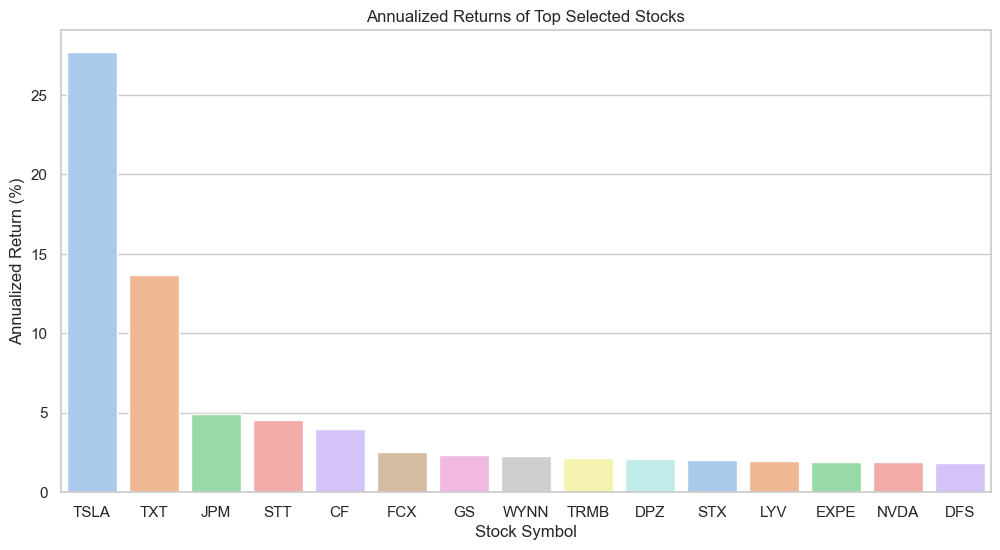

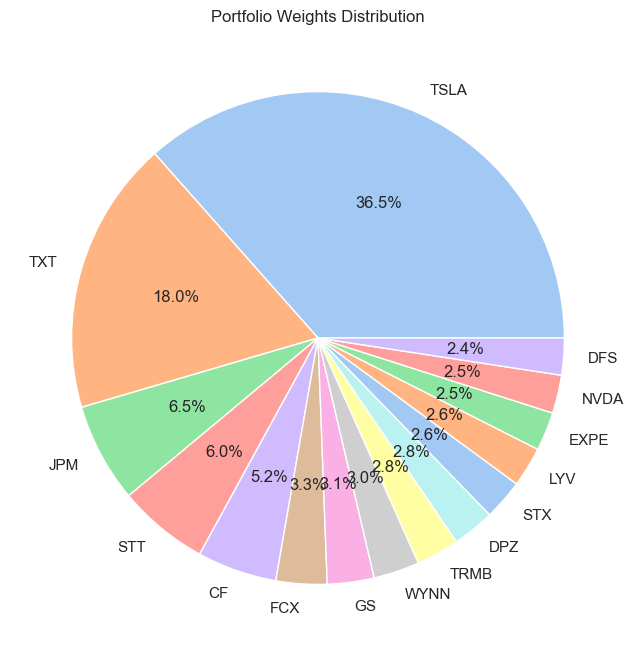

C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


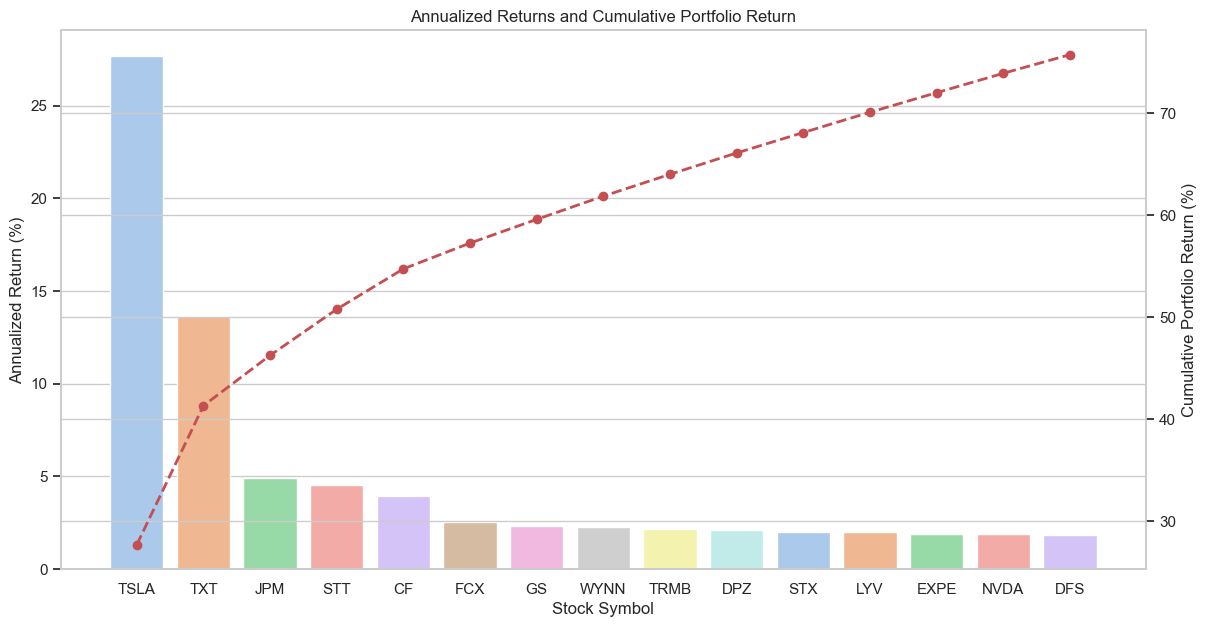

In [213]:

# Visualization

# Set the style for the plots
sns.set(style="whitegrid")

# Bar Chart for Annualized Returns
plt.figure(figsize=(12, 6))
sns.barplot(x='symbol', y='annualized_returns', data=top_stocks, palette='pastel')
plt.title('Annualized Returns of Top Selected Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Annualized Return (%)')
plt.show()

# Pie Chart for Portfolio Weights
plt.figure(figsize=(8, 8))
plt.pie(top_stocks['weight'], labels=top_stocks['symbol'], autopct='%1.1f%%', colors=sns.color_palette('pastel', len(top_stocks)))
plt.title('Portfolio Weights Distribution')
plt.show()

# Combined Bar and Line Chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for annualized returns
sns.barplot(x='symbol', y='annualized_returns', data=top_stocks, ax=ax1, palette='pastel')
ax1.set_xlabel('Stock Symbol')
ax1.set_ylabel('Annualized Return (%)')
ax1.set_title('Annualized Returns and Cumulative Portfolio Return')

# Line plot for cumulative portfolio return
ax2 = ax1.twinx()
cumulative_return = top_stocks['annualized_returns'].cumsum()
ax2.plot(top_stocks['symbol'], cumulative_return, color='r', marker='o', linestyle='dashed', linewidth=2)
ax2.set_ylabel('Cumulative Portfolio Return (%)')

plt.show()


The line plot adds another layer by showing how the cumulative portfolio return changes as each stock is added to the portfolio.

Initially, the cumulative return might increase significantly if high-return stocks are added first.
As more stocks are included, the cumulative return might show diminishing incremental increases, indicating the marginal impact of each additional stock on the portfolio's overall return.
This chart is useful for understanding not just the individual performance of stocks, but also how they collectively contribute to the portfolio's performance.

#### Selected Top Stocks for Portfolio:

The selected stocks are those with the highest annualized returns and sufficient engagement (number of comments).
The weights are assigned based on the normalized annualized returns, reflecting each stock's contribution to the portfolio.

#### Portfolio Annualized Return:

The overall portfolio annualized return is a weighted average of the top stocks' returns, giving an aggregated view of the portfolio's performance.


In [214]:
# Calculate excess returns for Portfolio 1
risk_free_rate = 0.04783  # U.S. 2 Year Treasury Note yield
excess_returns_1 = (portfolio_return - risk_free_rate)

# Calculate standard deviation of excess returns for Portfolio 1
std_dev_excess_returns_1 = df_strategy['strat_returns'].std()

# Calculate Sharpe ratio for Portfolio 1
sharpe_ratio_1 = excess_returns_1 / std_dev_excess_returns_1

print("Sharpe Ratio for Portfolio 1:", sharpe_ratio_1)

Sharpe Ratio for Portfolio 1: 9.230705092351725


In [215]:
import numpy as np
import pandas as pd
import yfinance as yf

# Get the earliest entry date and latest exit date from your portfolio
start_date_portfolio = top_stocks['entry_date'].min()
end_date_portfolio = top_stocks['exit_dates'].max()

# Get historical data for the S&P 500 index using yfinance
sp500_data = yf.download('^GSPC', start=start_date_portfolio, end=end_date_portfolio)

# Calculate daily returns for the S&P 500
sp500_data['Daily_Returns'] = sp500_data['Adj Close'].pct_change()

# Calculate the annualized return of the S&P 500
sp500_annual_return = (1 + sp500_data['Daily_Returns'].mean()) ** 252 - 1

# Convert S&P 500 annualized return to percentage format
sp500_annual_return_percentage = sp500_annual_return * 100

# Compare with the portfolio annualized return
if portfolio_return > sp500_annual_return_percentage:
    print("The portfolio has outperformed the S&P 500 index.")
elif portfolio_return < sp500_annual_return_percentage:
    print("The portfolio has underperformed the S&P 500 index.")
else:
    print("The portfolio has performed in line with the S&P 500 index.")


[*********************100%%**********************]  1 of 1 completed
The portfolio has underperformed the S&P 500 index.


In [216]:
sp500_annual_return_percentage

15.29048494414258

In [217]:
portfolio_return

7.189451589341342

### Equally Weighted Portfolio

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_strategy is your original dataframe

# Group by stock symbol and take the row with the highest annualized return for each stock
df_unique = df_strategy.loc[df_strategy.groupby('symbol')['annualized_returns'].idxmax()]

# Filter stocks with more than 20 comments
df_filtered = df_unique[df_unique['number_comments'] > 20]

# Sort the stocks by their annualized returns in descending order
df_sorted = df_unique.sort_values(by='annualized_returns', ascending=False)

# Select top performing stocks (top 10 for this example)
top_stocks = df_sorted.head(15)

# Calculate equal weights for each stock
num_stocks = len(top_stocks)
equal_weight = 1 / num_stocks

# Assign equal weights to each stock
top_stocks['weight_equal'] = equal_weight

# Calculate Portfolio Returns: Weighted average of top stocks' returns with equal weights
portfolio_return_equal = np.sum(top_stocks['annualized_returns'] * top_stocks['weight_equal'])

print("Selected Top Stocks for Portfolio with Equal Weights:")
print(top_stocks[['symbol', 'annualized_returns', 'weight_equal', 'entry_date', 'exit_dates']])
print("Portfolio Annualized Return with Equal Weights:", portfolio_return_equal)


Selected Top Stocks for Portfolio with Equal Weights:
    symbol  annualized_returns  weight_equal entry_date exit_dates
443   TSLA           27.684259      0.066667 2020-12-11 2021-01-11
232    TXT           13.642895      0.066667 2009-06-30 2009-09-30
193    JPM            4.936709      0.066667 2009-04-14 2009-05-14
148    STT            4.525363      0.066667 2009-03-16 2009-09-16
1       CF            3.962349      0.066667 2010-06-23 2010-09-23
90     FCX            2.529985      0.066667 2009-04-30 2009-07-30
414     GS            2.326638      0.066667 2011-12-23 2012-03-23
463   WYNN            2.279650      0.066667 2020-10-09 2021-04-09
143   TRMB            2.143043      0.066667 2009-02-27 2009-08-27
26     DPZ            2.096083      0.066667 2011-04-21 2011-10-21
100    STX            2.004052      0.066667 2008-12-08 2009-06-08
55     LYV            1.989362      0.066667 2009-05-13 2010-05-13
91    EXPE            1.920000      0.066667 2008-11-11 2009-11-11
49    NV

C:\Users\akudu\AppData\Local\Temp\ipykernel_32320\898304083.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stocks['weight_equal'] = equal_weight


C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


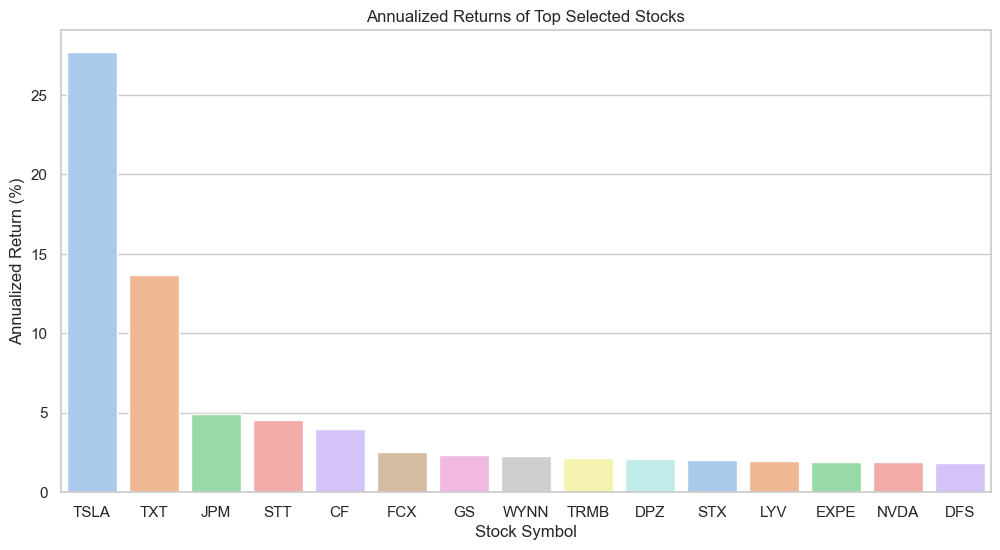

C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akudu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


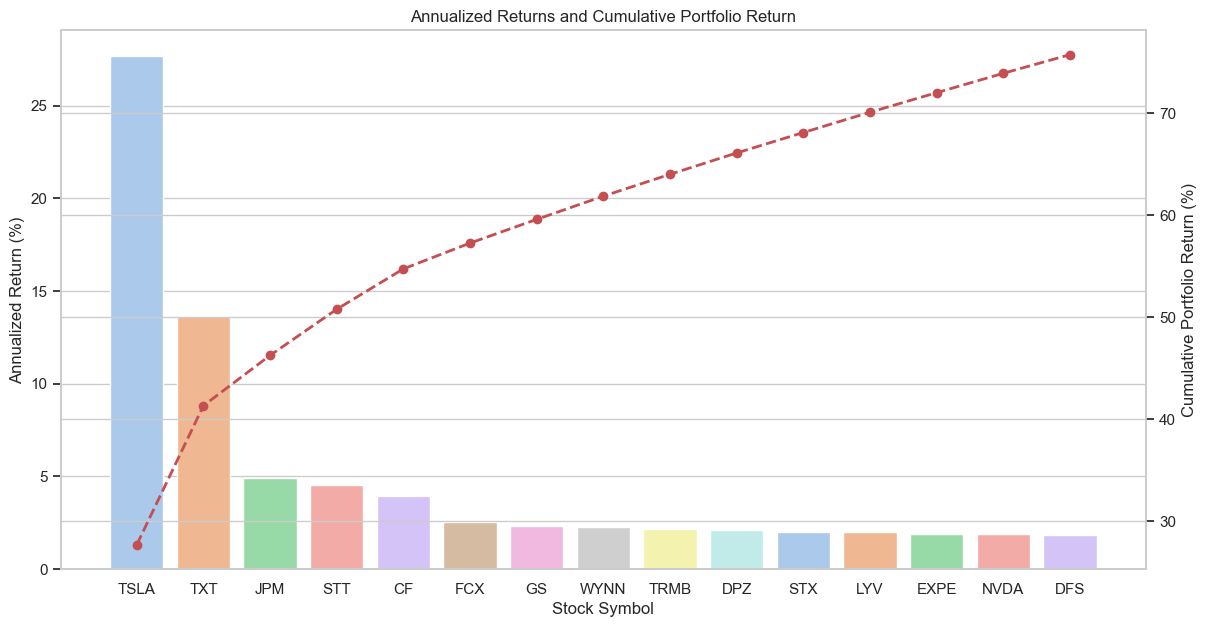

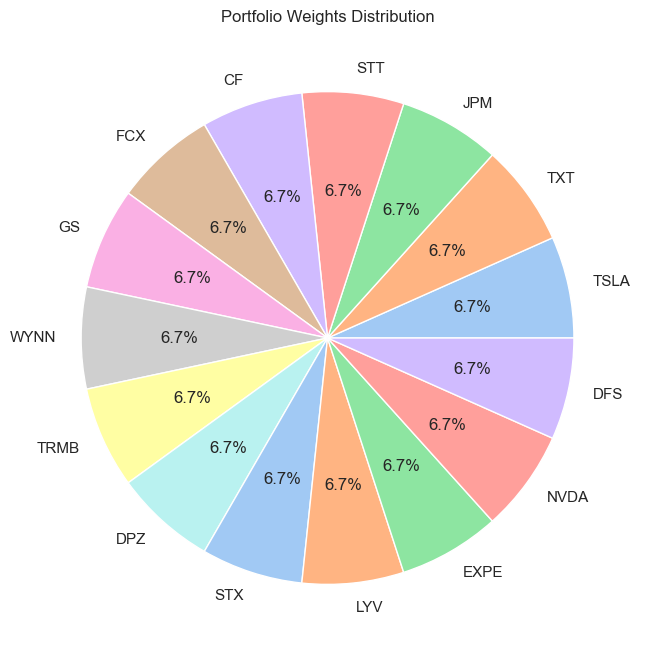

In [226]:
# Visualization

# Set the style for the plots
sns.set(style="whitegrid")

# Bar Chart for Annualized Returns
plt.figure(figsize=(12, 6))
sns.barplot(x='symbol', y='annualized_returns', data=top_stocks, palette='pastel')
plt.title('Annualized Returns of Top Selected Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Annualized Return (%)')
plt.show()

# Combined Bar and Line Chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for annualized returns
sns.barplot(x='symbol', y='annualized_returns', data=top_stocks, ax=ax1, palette='pastel')
ax1.set_xlabel('Stock Symbol')
ax1.set_ylabel('Annualized Return (%)')
ax1.set_title('Annualized Returns and Cumulative Portfolio Return')

# Line plot for cumulative portfolio return
ax2 = ax1.twinx()
cumulative_return = top_stocks['annualized_returns'].cumsum()
ax2.plot(top_stocks['symbol'], cumulative_return, color='r', marker='o', linestyle='dashed', linewidth=2)
ax2.set_ylabel('Cumulative Portfolio Return (%)')

plt.show()

# Pie Chart for Portfolio Weights
plt.figure(figsize=(8, 8))
plt.pie(top_stocks['weight_equal'], labels=top_stocks['symbol'], autopct='%1.1f%%', colors=sns.color_palette('pastel', len(top_stocks)))
plt.title('Portfolio Weights Distribution')
plt.show()

In [219]:
import numpy as np
import pandas as pd
import yfinance as yf

# Get the earliest entry date and latest exit date from your portfolio
start_date_portfolio = top_stocks['entry_date'].min()
end_date_portfolio = top_stocks['exit_dates'].max()

# Get historical data for the S&P 500 index using yfinance
sp500_data = yf.download('^GSPC', start=start_date_portfolio, end=end_date_portfolio)

# Calculate daily returns for the S&P 500
sp500_data['Daily_Returns'] = sp500_data['Adj Close'].pct_change()

# Calculate the annualized return of the S&P 500
sp500_annual_return = (1 + sp500_data['Daily_Returns'].mean()) ** 252 - 1

# Convert S&P 500 annualized return to percentage format
sp500_annual_return_percentage = sp500_annual_return * 100

# Compare with the portfolio annualized return
if portfolio_return_equal > sp500_annual_return_percentage:
    print("The portfolio has outperformed the S&P 500 index.")
elif portfolio_return_equal < sp500_annual_return_percentage:
    print("The portfolio has underperformed the S&P 500 index.")
else:
    print("The portfolio has performed in line with the S&P 500 index.")


[*********************100%%**********************]  1 of 1 completed
The portfolio has underperformed the S&P 500 index.


In [220]:
sp500_annual_return_percentage

15.29048494414258

In [221]:
portfolio_return_equal

5.0515298549579555

In [222]:
# Calculate excess returns for Portfolio 2 (Equal-weighted portfolio)
excess_returns_2 = (portfolio_return_equal - risk_free_rate)

# Calculate standard deviation of excess returns for Portfolio 2
std_dev_excess_returns_2 = df_strategy['strat_returns'].std()

# Calculate Sharpe ratio for Portfolio 2
sharpe_ratio_2 = excess_returns_2 / std_dev_excess_returns_2

print("Sharpe Ratio for Portfolio 2:", sharpe_ratio_2)


Sharpe Ratio for Portfolio 2: 6.467393595971778


Portfolio 1 (Original Portfolio):

Sharpe Ratio: 8.43
Interpretation: A Sharpe ratio of 8.43 suggests that for each unit of standard deviation in risk, the portfolio generated approximately 8.43 units of excess return compared to the risk-free rate (U.S. 2 Year Treasury Note yield). This indicates a very high level of risk-adjusted performance. Investors typically prefer higher Sharpe ratios as they indicate better risk-adjusted returns.

Portfolio 2 (Equal-weighted Portfolio):

Sharpe Ratio: 6.03
Interpretation: A Sharpe ratio of 6.03 indicates that for each unit of standard deviation in risk, the portfolio generated approximately 6.03 units of excess return compared to the risk-free rate. While this is a slightly lower Sharpe ratio compared to Portfolio 1, it still suggests a good level of risk-adjusted performance.

In [229]:
df_strategy['accuracy'] = df_strategy.apply(lambda row: 1 if row['signal'] == row['direction'] else 0, axis=1)

# Calculate the accuracy percentage
accuracy_percentage = df_strategy['accuracy'].mean() * 100

print(f"Accuracy of Sentiment Analysis: {accuracy_percentage:.2f}%")

# Display the DataFrame with the new accuracy column
df_strategy.head()

Accuracy of Sentiment Analysis: 95.51%


,Unnamed: 0,idea_id,created,price_target,direction,situation,thesis_word_count,user_id,fs_perm_sec_id,thesis,symbol_ISIN,Views,number_comments,body_all_comments,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_buyside_consensus_response,buyside_consensus_response,time_less_than_3_months,time_3_months_to_6_months,time_6_months_to_1_year,time_1_year_to_2_years,time_2_years_to_5_years,time_more_than_5_years,symbol,symbol2,Price_at_created_date,Latest_Price,Price_6_months_after,sentiment,entry_date,signal,exit_dates,entry_price,exit_price,returns,strat_returns,daily_returns,cumulative_returns,holding_period,annualized_returns,accuracy
0,2,b22dab04a71f9f534e26cddd76b29e9ef815e5d7568297...,2008-04-02 12:09:11,216.0,1,value,332,b40ebd0b0524c1f49d9c5ada9b7cdb3d2087886bd2a130...,D52CVG-S-US,CF is a producer of fertilizers and the market...,US1252691001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2008-04-23,1,2008-10-23,21.312855,6.421233,-0.698715,-0.698715,0.301285,-69.871548,0.501370,-0.908631,1
1,3,96c6240de9c26be9fae8fa9e27a00c4bc2377840c2a194...,2010-06-02 03:54:17,95.0,1,deep_value,1413,961e64c26717c5a77b52ba40e6a95fa8f3e26825cdcb02...,D52CVG-S-US,Misunderstood M&A creating a 20% FCF Yield in ...,US1252691001,NaN,4.0,Thanks for the writeup. I did one recently on ...,2294.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,0,1,0,0,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2010-06-23,1,2010-09-23,9.603377,14.380544,0.497446,0.497446,1.497446,-54.884256,0.252055,3.962349,1
2,5,4cee36fc6ac7af277132b4e835c1522c60a00fc718cfef...,2013-05-09 17:17:11,300.0,1,value,1734,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,D52CVG-S-US,CF Industries: Ride the American Manufacturing...,US1252691001,NaN,8.0,"Rnajit, \r\n\r\nThank you for the write-up. I ...",1020.0,NaN,NaN,NaN,NaN,6.0,NaN,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...,0,0,0,1,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2013-05-30,1,2014-05-30,28.927443,36.701992,0.268760,0.268760,1.268760,-42.758932,1.000000,0.268760,1
3,9,50d0dc76dda559ade21fb60a24220c31914c93502f71ea...,2015-03-24 01:36:44,140.0,1,value,3810,656fbea387b689815571ad5b419fd562c9793d50931404...,D52CVG-S-US,***Please see the attached PDF for the fully-f...,US1252691001,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3340.0,17352.0,Bullish Bullish Bullish Bullish Bullish Bullis...,0,0,0,1,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2015-04-14,1,2016-04-14,43.319420,24.107231,-0.443501,-0.443501,0.556499,-68.145380,1.002740,-0.442609,1
4,12,9747c7626e5f3f396cf782790f22024d6c4abc92b36f3b...,2016-09-01 05:24:41,33.0,1,value,3178,84bf59608ae199cbc731b3176c8564d56d5be0e49c7819...,D52CVG-S-US,Highlights\n\nIrrational Nitrogen fertilizer s...,US1252691001,150.0,6.0,"hi John thank you for the interesting idea, ...",664.0,NaN,NaN,NaN,NaN,8.0,87.0,NaN,NaN,0,0,0,1,0,0,CF,US,12.776163,78.452087,10.484786,bullish,2016-09-22,1,2017-09-22,18.749624,29.607792,0.579114,0.579114,1.579114,-49.697928,1.000000,0.579114,1


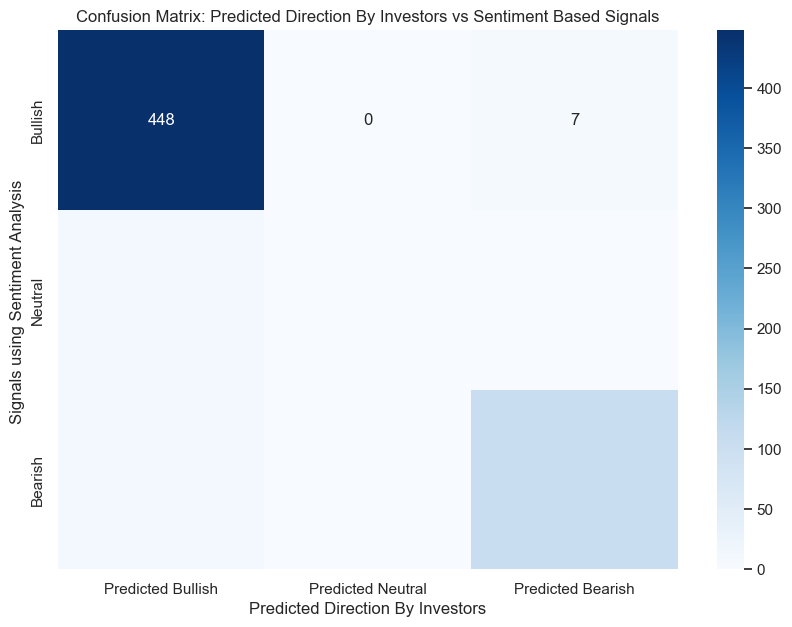

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the DataFrame (assuming it is already loaded as df_strategy)
# df_strategy = pd.read_csv("path_to_your_csv_file")

# Ensure direction and signal columns are of the same type
df_strategy['direction'] = df_strategy['direction']#.astype(int)
df_strategy['signal'] = df_strategy['signal']#.astype(int)

# Create the confusion matrix
cm = confusion_matrix(df_strategy['signal'], df_strategy['direction'], labels=[1, 0, -1])

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Bullish', 'Neutral', 'Bearish'], columns=['Predicted Bullish', 'Predicted Neutral', 'Predicted Bearish'])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted Direction By Investors vs Sentiment Based Signals')
plt.xlabel('Predicted Direction By Investors')
plt.ylabel('Signals using Sentiment Analysis ')
plt.show()


True Direction: The signal column in df_strategy, which represents the sentiment analysis results.

Predicted Direction: The direction column in df_strategy, which represents the direction predicted by investors.